# Use spectra of CTIO Data in June 2017 to do atmospheric studies
==================================================================================================

- author : Sylvie Dagoret-Campagne
- affiliation : LAL/IN2P3/CNRS 
- creation date   : June 9th 2017
- Big update : October 23th 2017

- version 1


In [50]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [89]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

print theNotebook
from IPython.display import Image, display
import sys
sys.path.append("../../common_tools/")
from common_notebook import *
init_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
AnaAerCalibSpectrum
ccdproc version 1.2.0
bottleneck version 1.2.1
/Users/dagoret/MacOSX/GitHub/LSST/CTIOAnaJun2017/CTIOAnaJun2017/ana_30may17/HD111980


In [4]:
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

In [5]:
from scipy.interpolate import interp1d

In [6]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (6, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [7]:
#%config InlineBackend.rc = {}
#matplotlib.rc_file("../../templates/matplotlibrc")

# Initialisation

In [8]:
ShowInputSpectra=False

## Input fits file

In [9]:
inputdir="./simandcalibspec"
MIN_IMGNUMBER=58
MAX_IMGNUMBER=190
date="20170530"
object_name='HD111980'
tag = "calibandSimSpectra"
SelectTagRe='^%s_%s_([0-9]+).fits$' % (tag,date) # regular expression to select the file
SearchTagRe='^%s_%s_[0-9]+.fits$' % (tag,date)
NBIMGPERROW=2

## Output

In [10]:
dir_top_images="images_notebooks/"+theNotebook ### Top directory to save images
ensure_dir(dir_top_images) # create that directory

outputdir="./spectrum_anaaer"
ensure_dir(outputdir)

In [11]:
output_file='AnaAtmAerFromSpectra_'+object_name+'.csv'

# Read Input files

In [12]:
sorted_numbers,sorted_files = MakeFileList([inputdir],MIN_IMGNUMBER,MAX_IMGNUMBER,SelectTagRe,SearchTagRe)

In [13]:
sorted_files[0:5]

array(['./simandcalibspec/calibandSimSpectra_20170530_058.fits',
       './simandcalibspec/calibandSimSpectra_20170530_059.fits',
       './simandcalibspec/calibandSimSpectra_20170530_060.fits',
       './simandcalibspec/calibandSimSpectra_20170530_061.fits',
       './simandcalibspec/calibandSimSpectra_20170530_062.fits'], 
      dtype='|S54')

In [14]:
all_headers, \
all_dates, \
all_objects, \
all_airmass, \
all_titles, \
all_exposures, \
all_ut, all_ra,all_dec,all_epoch,all_zenith,all_ha,all_st,all_alt,all_focus,\
all_temp, all_press,all_hum,all_windsp,\
all_seeing,all_seeingam,\
all_filt,all_filt1,all_filt2,\
all_leftspectra_data, \
all_rightspectra_data, \
all_leftspectra_data_stat_err ,\
all_rightspectra_data_stat_err ,\
all_leftspectra_wl,\
all_rightspectra_wl, \
all_totleftspectra_data, \
all_totrightspectra_data, \
all_sim_spectra_wl, \
all_sim_spectra_data=BuildCalibandSimSpecFull(sorted_files,sorted_numbers)

In [15]:
NDATA=len(all_rightspectra_data)
all_dt= [ parser.parse(all_dates[i]) for i in range(NDATA)]

# Clean spectra

In [16]:
all_sim_spectra_wl_cut,all_sim_spectra_data_cut=RemoveBadWavelengths(all_sim_spectra_wl,all_sim_spectra_data)
all_leftspectra_wl_cut,all_leftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data)
all_rightspectra_wl_cut,all_rightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data)

all_leftspectra_wl_cut,all_totleftspectra_data_cut=RemoveBadWavelengths(all_leftspectra_wl,all_totleftspectra_data)
all_rightspectra_wl_cut,all_totrightspectra_data_cut=RemoveBadWavelengths(all_rightspectra_wl,all_totrightspectra_data)

all_leftspectra_wl_cut,all_leftspectra_data_stat_err_cut=RemoveBadWavelengths(all_leftspectra_wl,all_leftspectra_data_stat_err)
all_rightspectra_wl_cut,all_rightspectra_data_stat_err_cut=RemoveBadWavelengths(all_rightspectra_wl,all_rightspectra_data_stat_err)

In [17]:
all_sim_spectra_wl,all_sim_spectra_data=all_sim_spectra_wl_cut,all_sim_spectra_data_cut
all_rightspectra_wl,all_rightspectra_data=all_rightspectra_wl_cut,all_rightspectra_data_cut
all_leftspectra_wl,all_leftspectra_data=all_leftspectra_wl_cut,all_leftspectra_data_cut
all_totleftspectra_data=all_totleftspectra_data_cut
all_totrightspectra_data=all_totrightspectra_data_cut
all_rightspectra_data_stat_err=all_rightspectra_data_stat_err_cut
all_leftspectra_data_stat_err=all_leftspectra_data_stat_err_cut

In [18]:
all_rightspectra_sim=all_sim_spectra_data
all_rightspectra_sim_wl=all_sim_spectra_wl

# Airmass

/Users/dagoret/anaconda/lib/python2.7/site-packages/matplotlib/cbook.py:2649: UserWarning: Saw kwargs [u'lw', u'linewidth'] which are all aliases for u'linewidth'.  Kept value from u'linewidth'
  seen=seen, canon=canonical, used=seen[-1]))


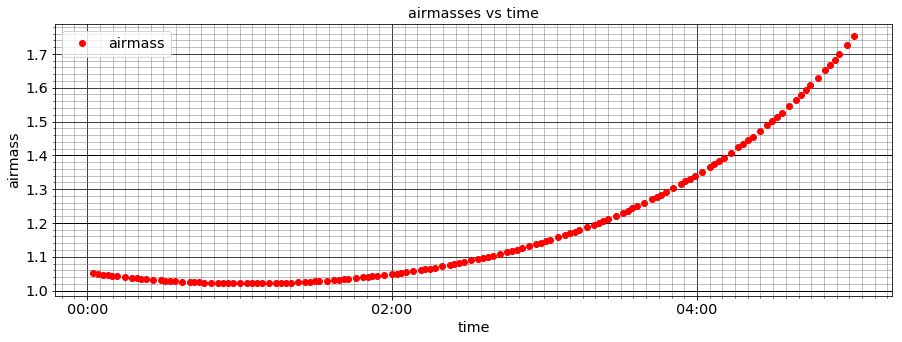

In [19]:
PlotDataVsDateTime(all_dates,all_airmass,"airmasses vs time","time","airmass",dir_top_images,'airmass_vs_time.pdf')

In [20]:
all_airmass=np.array(all_airmass)

# Sort Dispersers

In [21]:
print all_filt

['dia Thor300', 'dia Thor300', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg

In [22]:
filt0_idx,filt1_idx,filt2_idx,filt3_idx,filt4_idx,filt5_idx,filt6_idx=get_filt_idx(all_filt)

In [23]:
Thor300_index=np.array(filt1_idx)
Ron400_index=np.array(filt0_idx)
HoloPhP_index=np.array(filt2_idx)
HoloPhAg_index=np.array(filt3_idx)
HoloAmAg_index=np.array(filt4_idx)
Ron200_index=np.array(filt5_idx)

In [24]:
all_filt1=np.array(all_filt1)
all_filt2=np.array(all_filt2)

In [25]:
def FindIndexWithFilt(all_filt,in_index,tagfilt):
    all_filt_indisp=all_filt[in_index]
    sel_idx=np.where(all_filt_indisp==tagfilt)
    out_index=in_index[sel_idx]
    return out_index

In [26]:
all_filt1_Thor300=all_filt1[Thor300_index]
all_filt1_Ron400=all_filt1[Ron400_index]
all_filt1_HoloPhP=all_filt1[HoloPhP_index]
all_filt1_HoloPhAg=all_filt1[HoloPhAg_index]
all_filt1_HoloAmAg=all_filt1[HoloAmAg_index]
#all_filt1_Ron200=all_filt1[Ron200_index]

In [27]:
Thor300_index2=FindIndexWithFilt(all_filt1,Thor300_index,'RG715')
Ron400_index2=FindIndexWithFilt(all_filt1,Ron400_index,'RG715')
HoloPhP_index2=FindIndexWithFilt(all_filt1,HoloPhP_index,'RG715')
HoloPhAg_index2=FindIndexWithFilt(all_filt1,HoloPhAg_index,'RG715')
HoloAmAg_index2=FindIndexWithFilt(all_filt1,HoloAmAg_index,'RG715')
#Ron200_index2=FindIndexWithFilt(all_filt1,Ron200_index,'FGB37')

# Show spectra

In [28]:
if ShowInputSpectra:
    ShowCalibSpectrainPDF(all_rightspectra_data,all_rightspectra_data_stat_err,all_rightspectra_wl,all_titles,object_name,dir_top_images,all_filt,date,'calib1Dspectra_right.pdf','order +1')

# True Bouguer line on data spectrum

In [29]:
print all_filt

['dia Thor300', 'dia Thor300', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg', 'dia HoloAmAg', 'dia Ron400', 'dia Thor300', 'dia HoloPhP', 'dia HoloPhAg

# Bouguer Lines

## View Bouguer Lines

Ron400
--------------------------------------------------------------------------
z =  [-0.24962858  5.87022365]
popt =  [-0.24984866  5.87055968]  pcov [[  3.69216158e-05  -4.35206566e-05]
 [ -4.35206566e-05   5.27719349e-05]]  perr [ 0.00607632  0.00726443]
chi2 0.107253614734
--------------------------------------------------------------------------
z =  [-0.19069827  6.20125502]
popt =  [-0.19197626  6.20251773]  pcov [[  3.88174000e-05  -4.62467629e-05]
 [ -4.62467629e-05   5.67526441e-05]]  perr [ 0.00623036  0.00753344]
chi2 0.377983785842
--------------------------------------------------------------------------
z =  [-0.14273052  6.30256549]
popt =  [-0.14382041  6.30366015]  pcov [[  2.88552508e-05  -3.43226549e-05]
 [ -3.43226549e-05   4.19883800e-05]]  perr [ 0.00537171  0.00647984]
chi2 0.732907984144
--------------------------------------------------------------------------
z =  [-0.12363011  6.40551478]
popt =  [-0.12417019  6.40621344]  pcov [[  1.72096659e-05  -2.01549

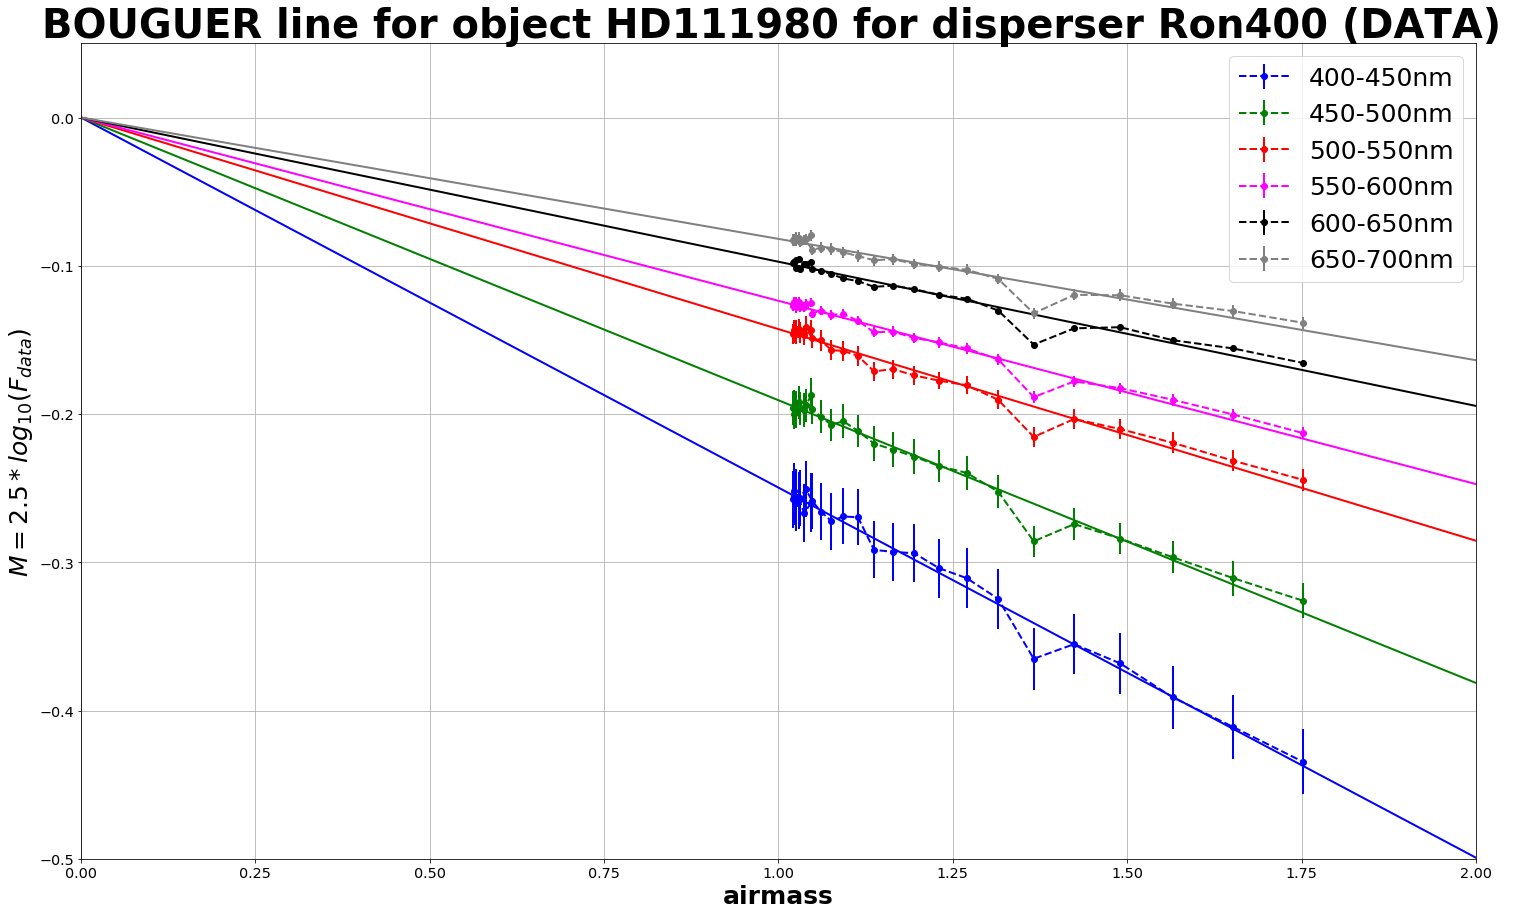

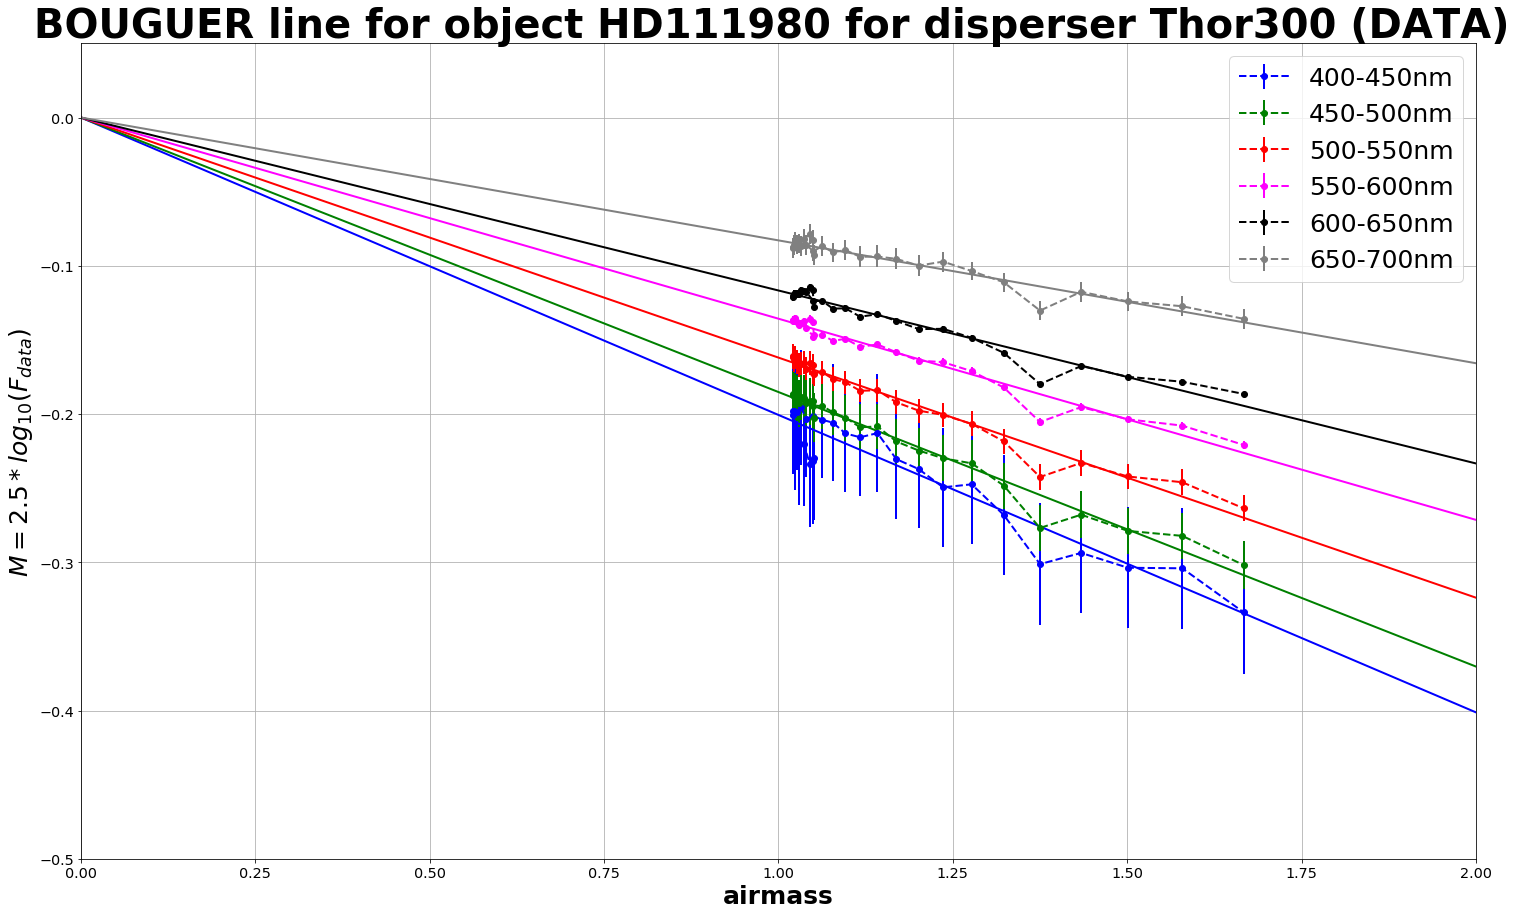

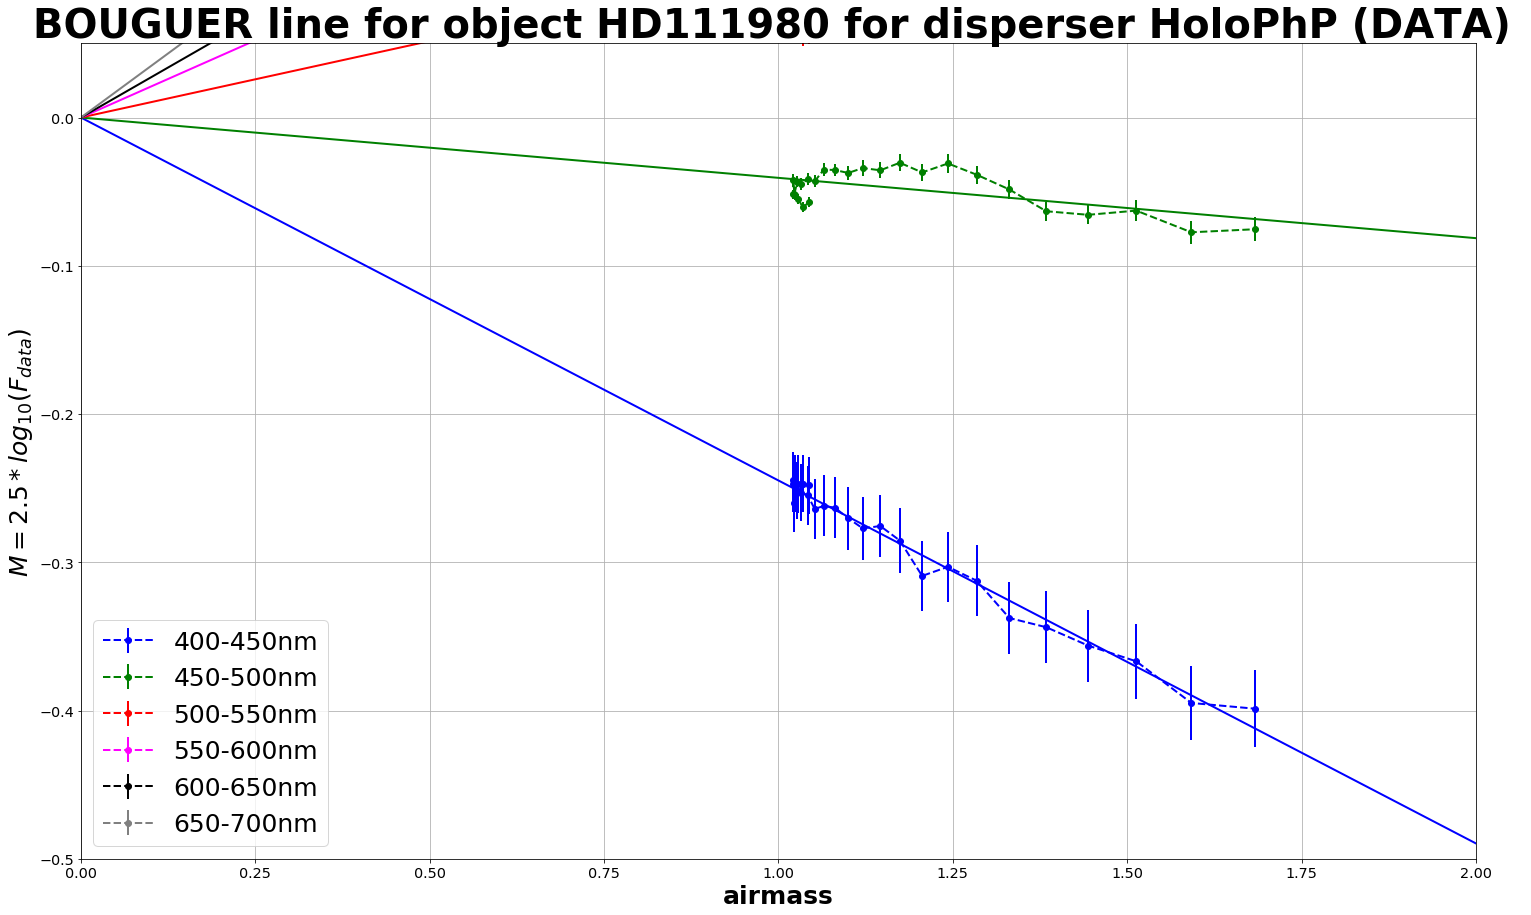

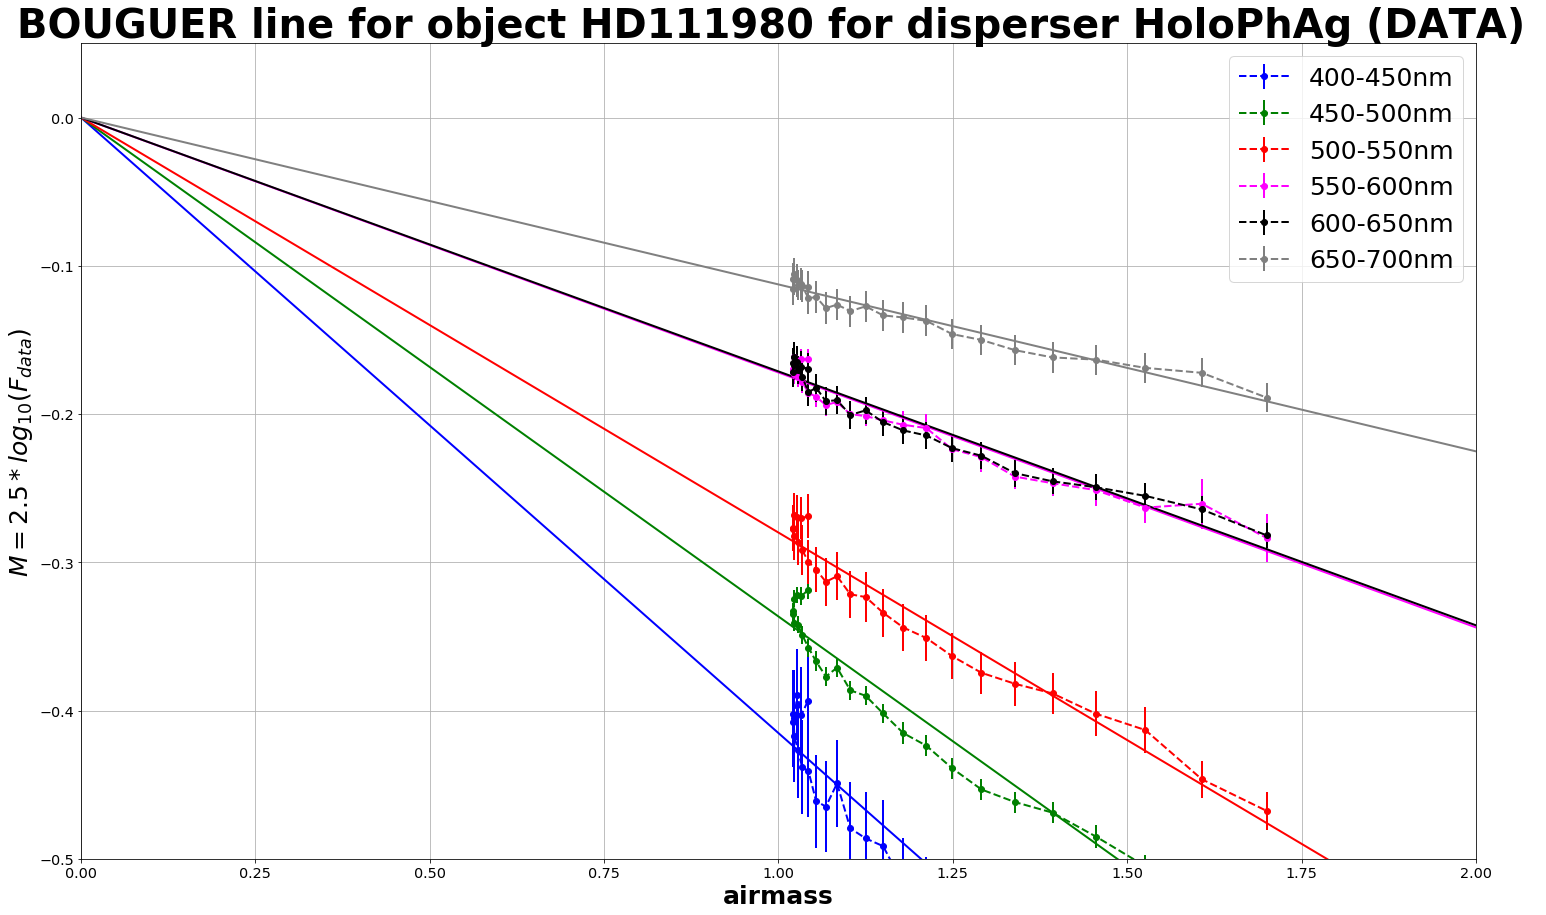

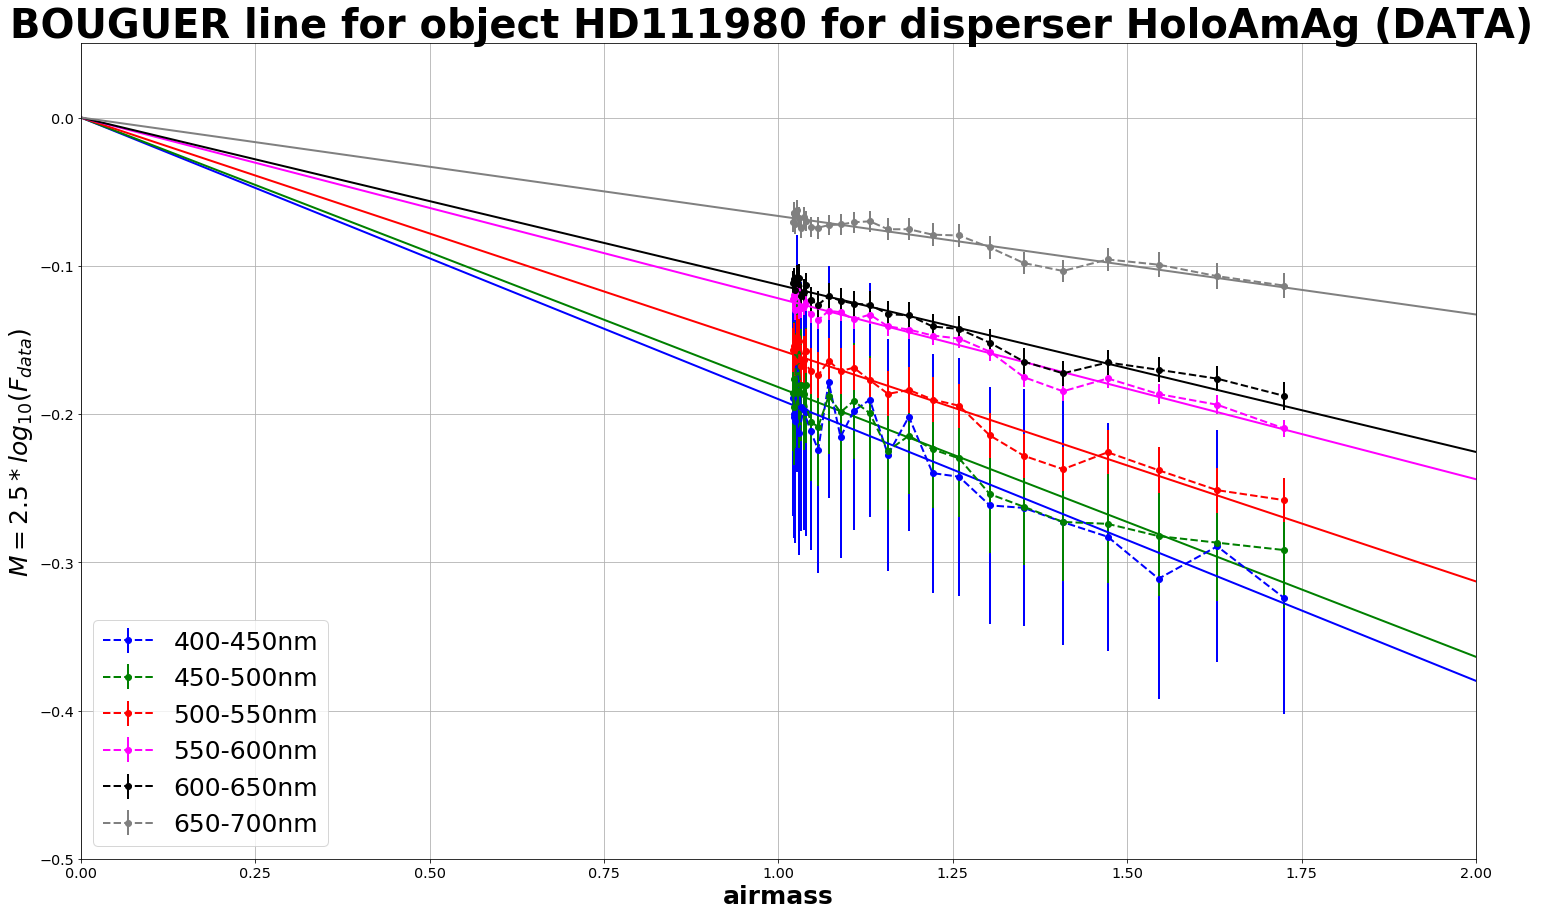

In [41]:
all_fitparamtruebouguer_data= []
all_popt_truebouguer_data=[]
all_perr_truebouguer_data= []
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        fitparamtruebouguer,popt_truebouguer,perr_truebouguer = ShowTrueBouguerData(all_rightspectra_wl,all_rightspectra_data,all_airmass,all_filt,object_name,dir_top_images,sel_filt=dispname)
        all_fitparamtruebouguer_data.append(fitparamtruebouguer)
        all_popt_truebouguer_data.append(popt_truebouguer)
        all_perr_truebouguer_data.append(perr_truebouguer)

Ron400
band1 [ -0.24211148 -29.97911619]
band2 [ -0.15797042 -29.83636848]
band3 [ -0.12034212 -29.83665125]
band4 [ -0.1101523  -29.84371901]
band5 [ -0.08415339 -29.90055467]
band6 [ -0.05926688 -29.99953373]
Thor300
band1 [ -0.24211256 -29.97910934]
band2 [ -0.15797281 -29.83636157]
band3 [ -0.12033975 -29.83665165]
band4 [ -0.11015294 -29.84371656]
band5 [ -0.08415734 -29.9005479 ]
band6 [ -0.05931726 -29.99947607]
HoloPhP
band1 [ -0.24204898 -29.97920293]
band2 [ -0.15793431 -29.83641876]
band3 [ -0.12031496 -29.83668879]
band4 [ -0.11013321 -29.84374543]
band5 [ -0.0841418 -29.900571 ]
band6 [ -0.05929158 -29.99950963]
HoloPhAg
band1 [ -0.24212776 -29.97908486]
band2 [ -0.15797883 -29.83635029]
band3 [ -0.1203499  -29.83663687]
band4 [ -0.11015802 -29.84370905]
band5 [ -0.08415864 -29.90054561]
band6 [ -0.05929814 -29.99949711]
HoloAmAg
band1 [ -0.24205003 -29.97920392]
band2 [ -0.15793445 -29.83641994]
band3 [ -0.12031595 -29.83668932]
band4 [ -0.11013622 -29.84374195]
band5 [ -

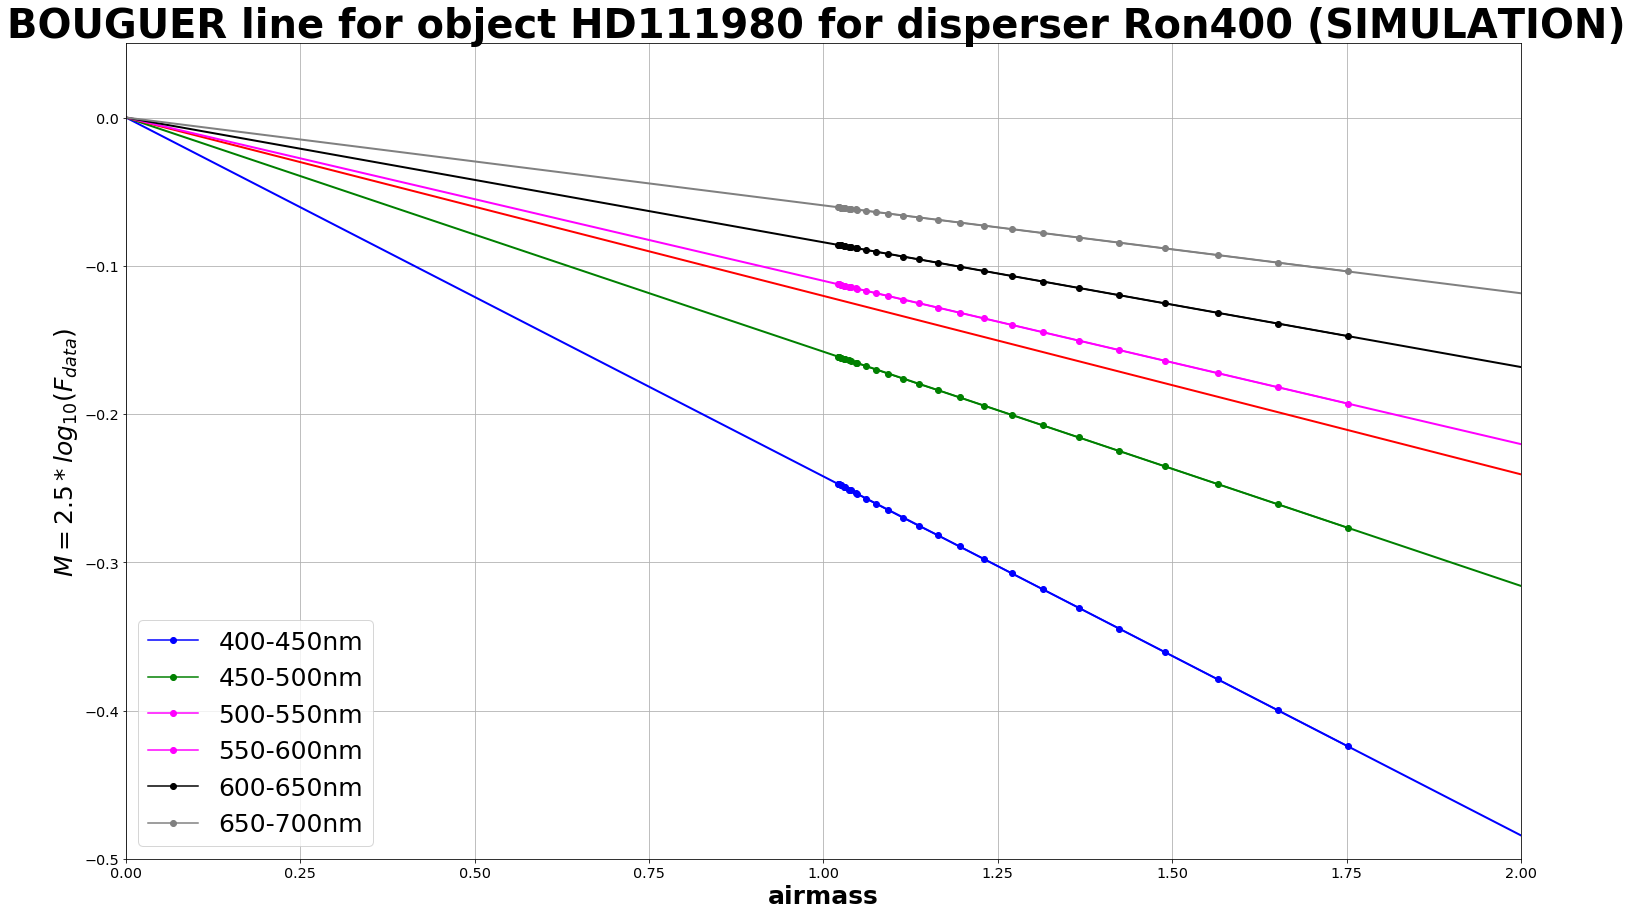

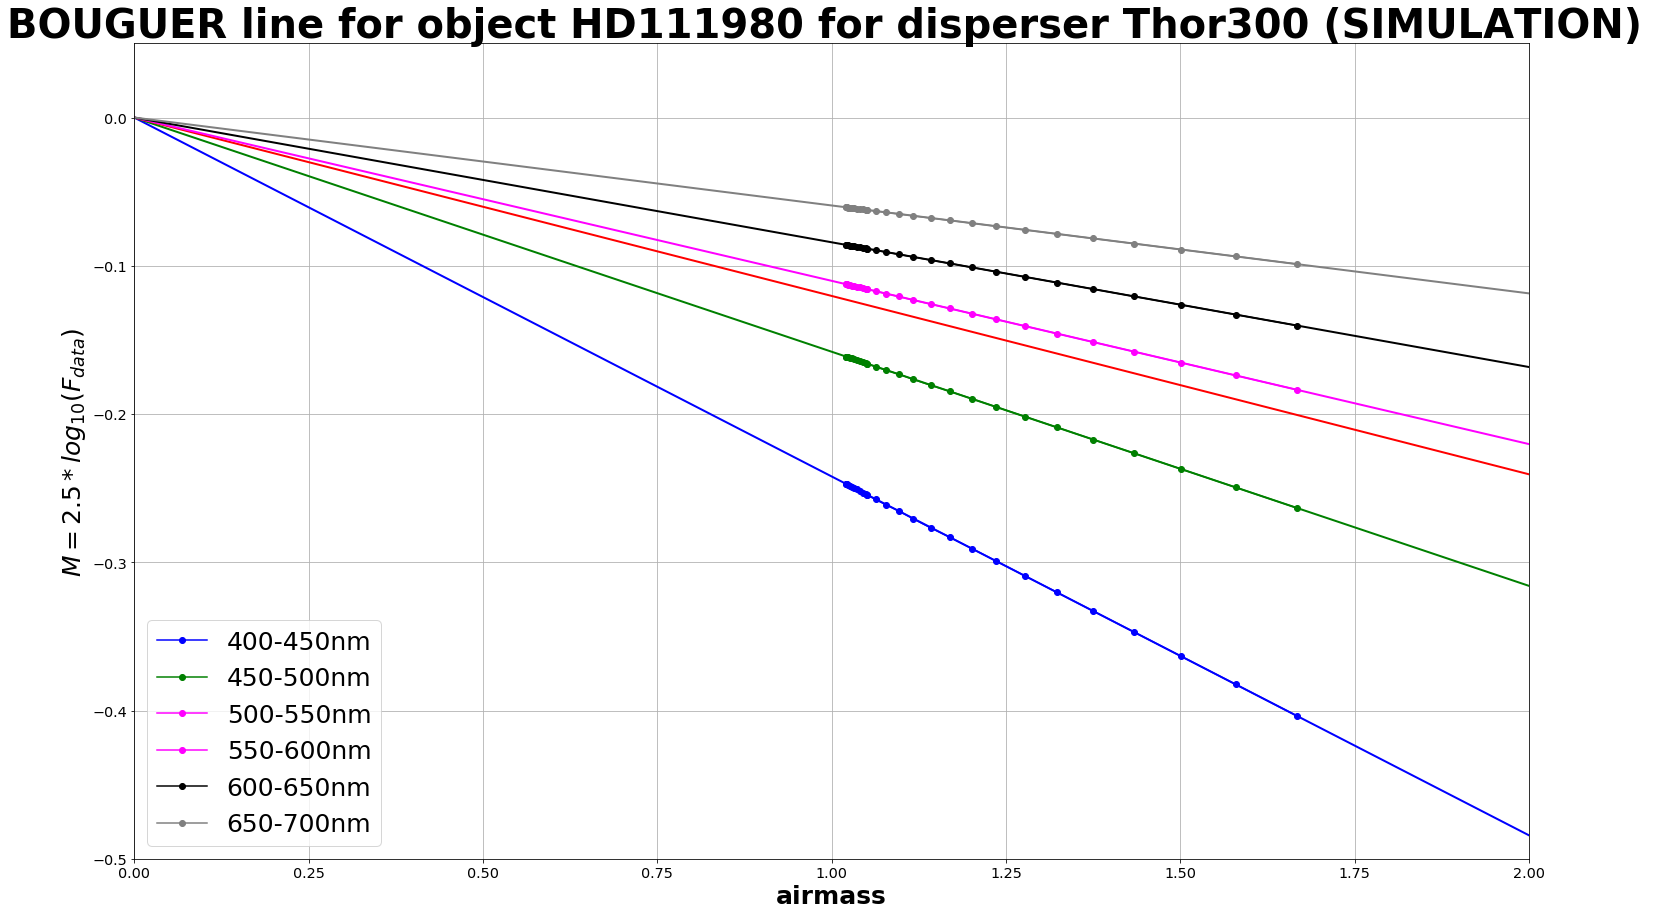

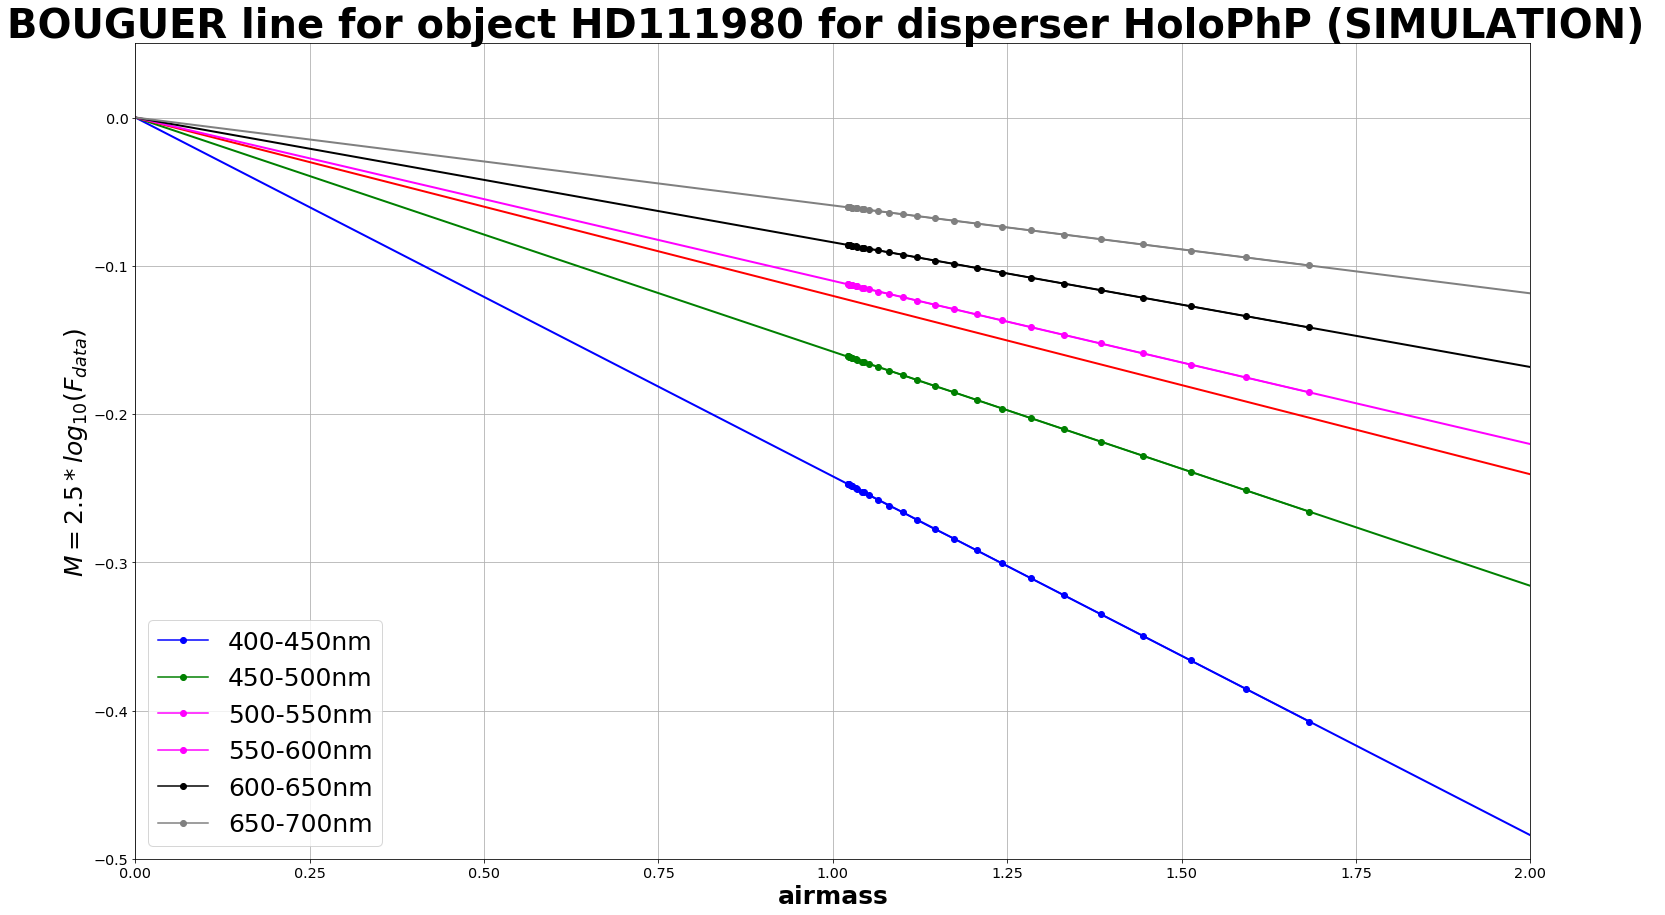

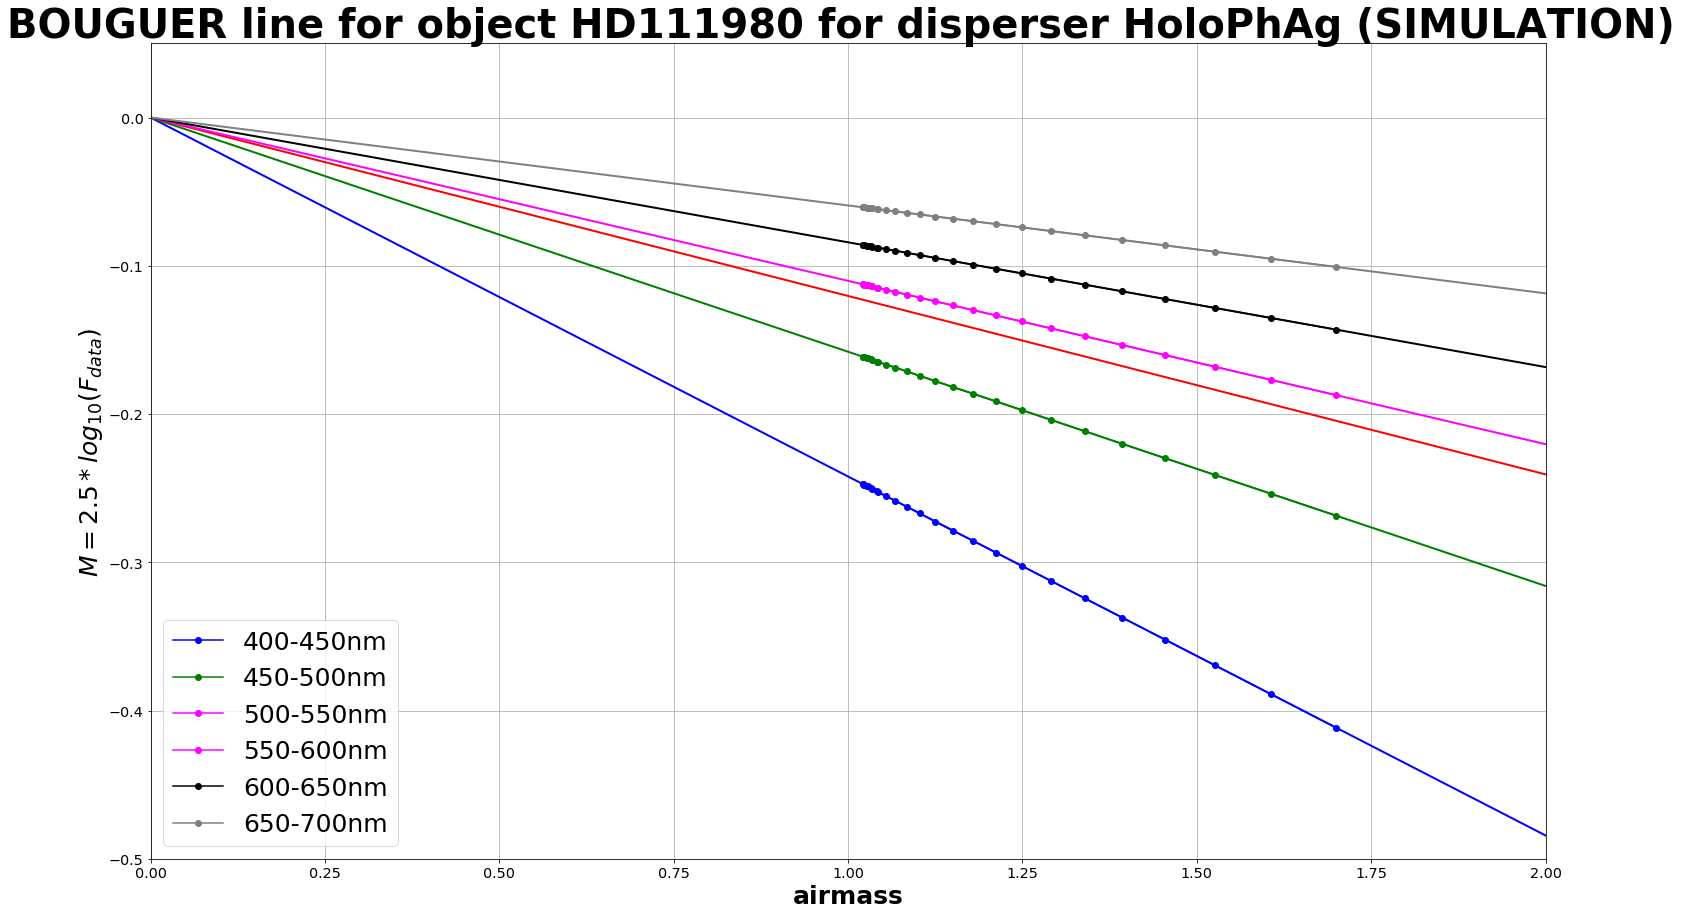

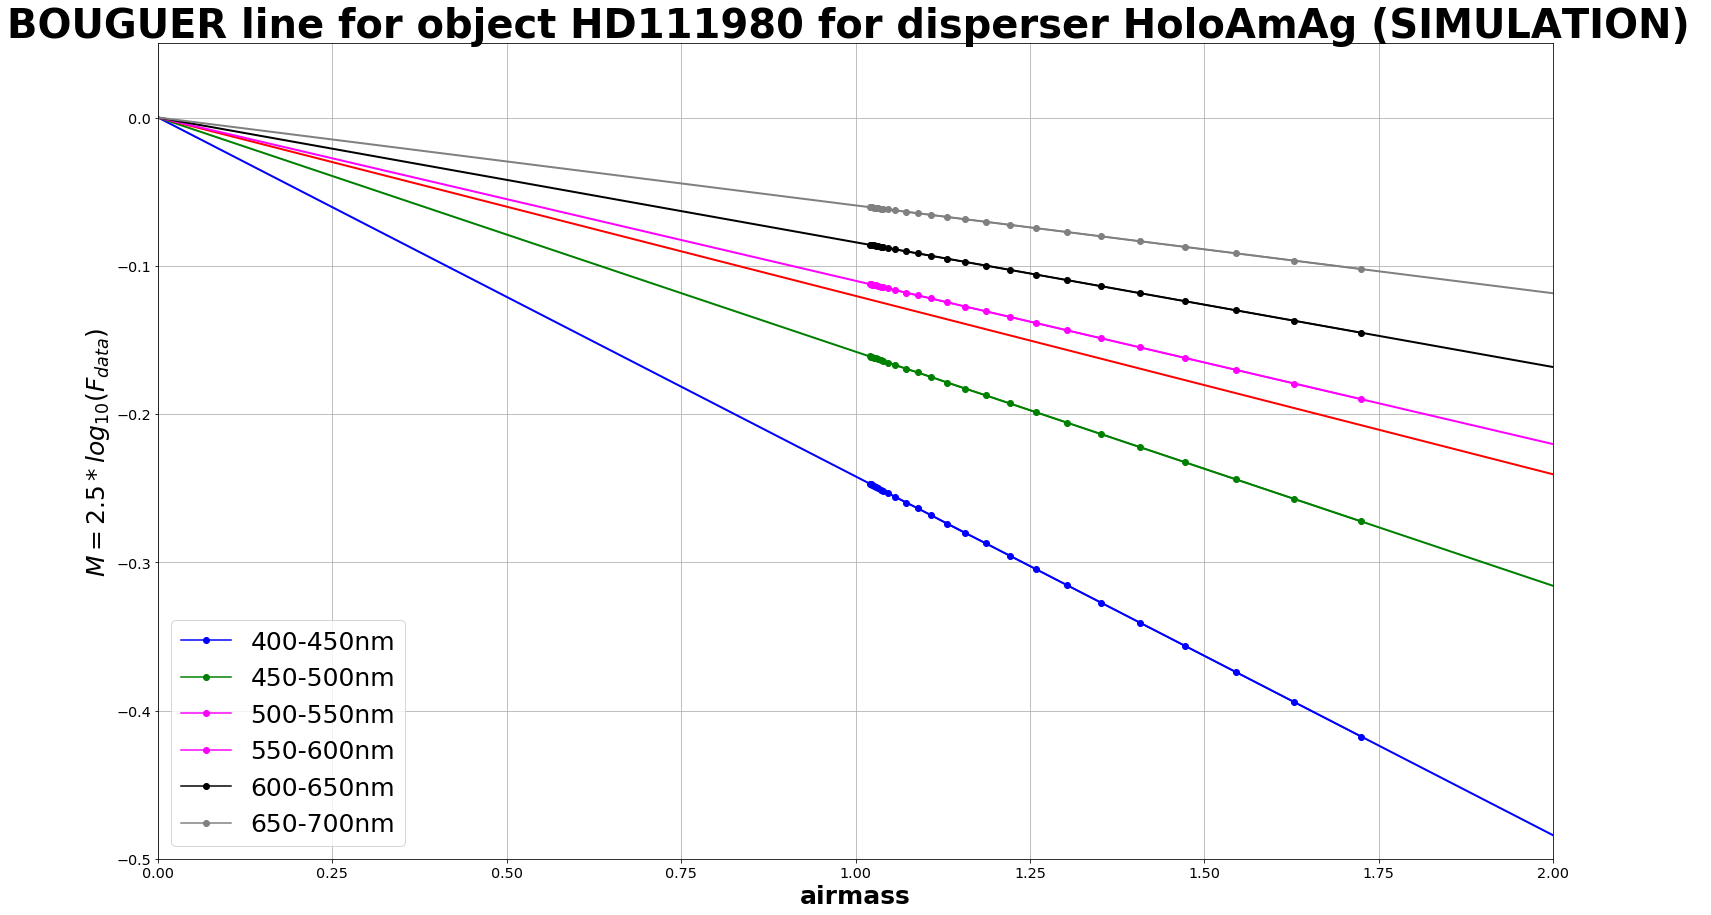

In [42]:
all_fitparamtruebouguer_sim= []
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        fitparamtruebouguer = ShowTrueBouguerSim(all_rightspectra_sim_wl,all_rightspectra_sim,all_airmass,all_filt,object_name,dir_top_images,sel_filt=dispname)
        all_fitparamtruebouguer_sim.append(fitparamtruebouguer)

Ron400
--------------------------------------------------------------------------
z =  [-0.24962858  5.87022365]
popt =  [-0.24984866  5.87055968]  pcov [[  3.69216158e-05  -4.35206566e-05]
 [ -4.35206566e-05   5.27719349e-05]]  perr [ 0.00607632  0.00726443]
chi2 0.107253614734
--------------------------------------------------------------------------
z =  [-0.19069827  6.20125502]
popt =  [-0.19197626  6.20251773]  pcov [[  3.88174000e-05  -4.62467629e-05]
 [ -4.62467629e-05   5.67526441e-05]]  perr [ 0.00623036  0.00753344]
chi2 0.377983785842
--------------------------------------------------------------------------
z =  [-0.14273052  6.30256549]
popt =  [-0.14382041  6.30366015]  pcov [[  2.88552508e-05  -3.43226549e-05]
 [ -3.43226549e-05   4.19883800e-05]]  perr [ 0.00537171  0.00647984]
chi2 0.732907984144
--------------------------------------------------------------------------
z =  [-0.12363011  6.40551478]
popt =  [-0.12417019  6.40621344]  pcov [[  1.72096659e-05  -2.01549

HoloPhAg
--------------------------------------------------------------------------
z =  [-0.41520181  6.39540816]
popt =  [-0.41614813  6.39649933]  pcov [[ 0.00042308 -0.00050051]
 [-0.00050051  0.0006081 ]]  perr [ 0.02056889  0.02465967]
chi2 0.448646354358
--------------------------------------------------------------------------
z =  [-0.33655742  6.73122654]
popt =  [-0.34882698  6.74669206]  pcov [[ 0.00031838 -0.00036538]
 [-0.00036538  0.00042898]]  perr [ 0.01784327  0.02071174]
chi2 6.16773884454
--------------------------------------------------------------------------
z =  [-0.27994804  6.73603385]
popt =  [-0.27906782  6.73555878]  pcov [[ 0.00012295 -0.00014842]
 [-0.00014842  0.00018476]]  perr [ 0.01108841  0.01359278]
chi2 0.664943410108
--------------------------------------------------------------------------
z =  [-0.17197049  6.46263335]
popt =  [-0.19061013  6.48377656]  pcov [[ 0.00014704 -0.00016463]
 [-0.00016463  0.00018736]]  perr [ 0.01212596  0.01368792]


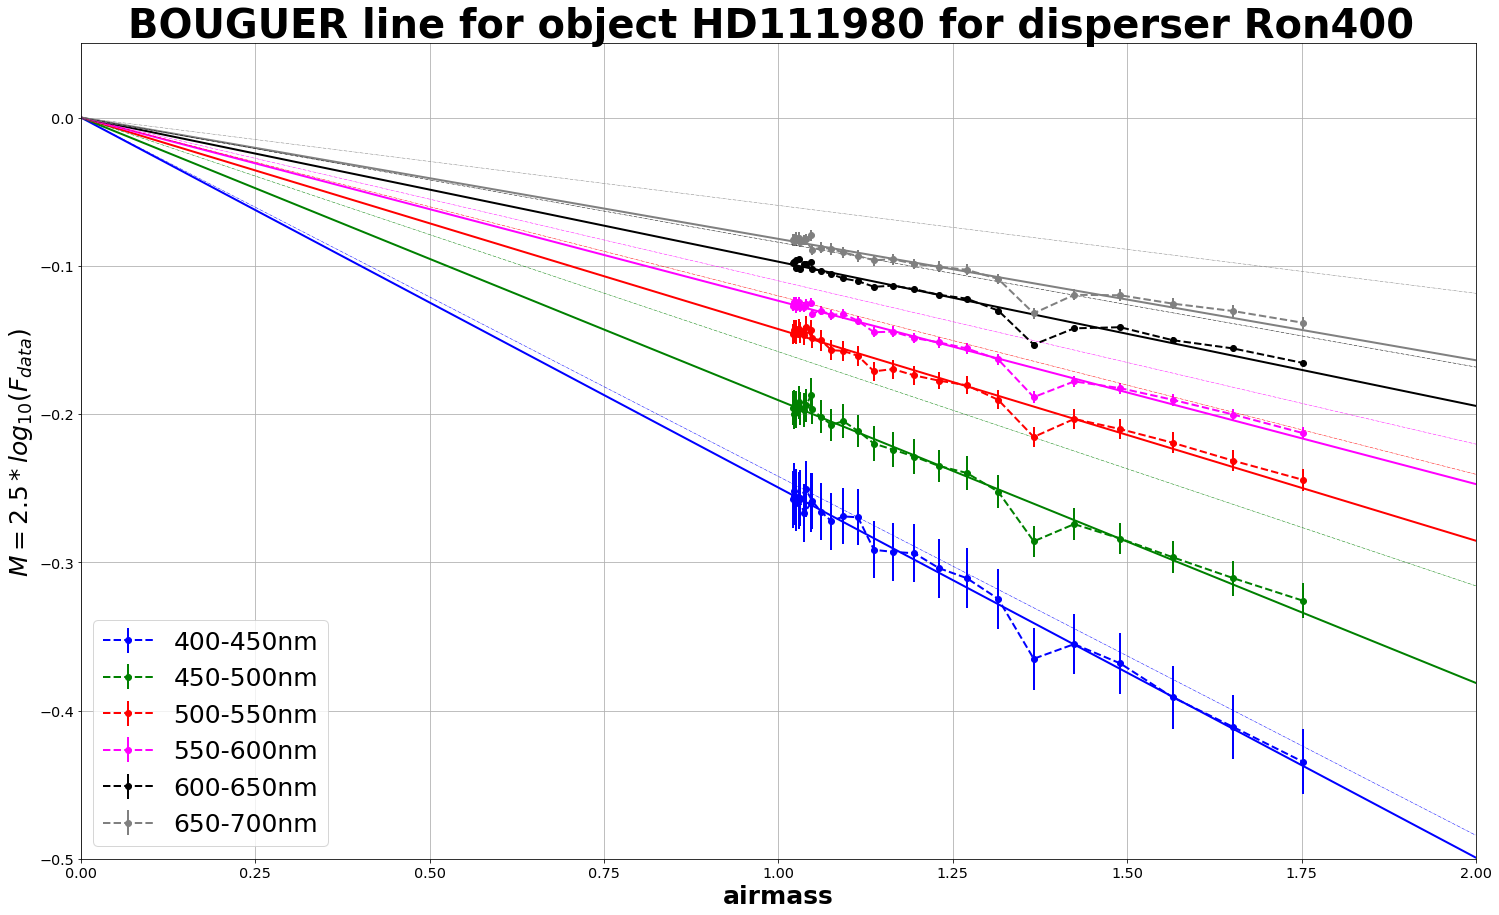

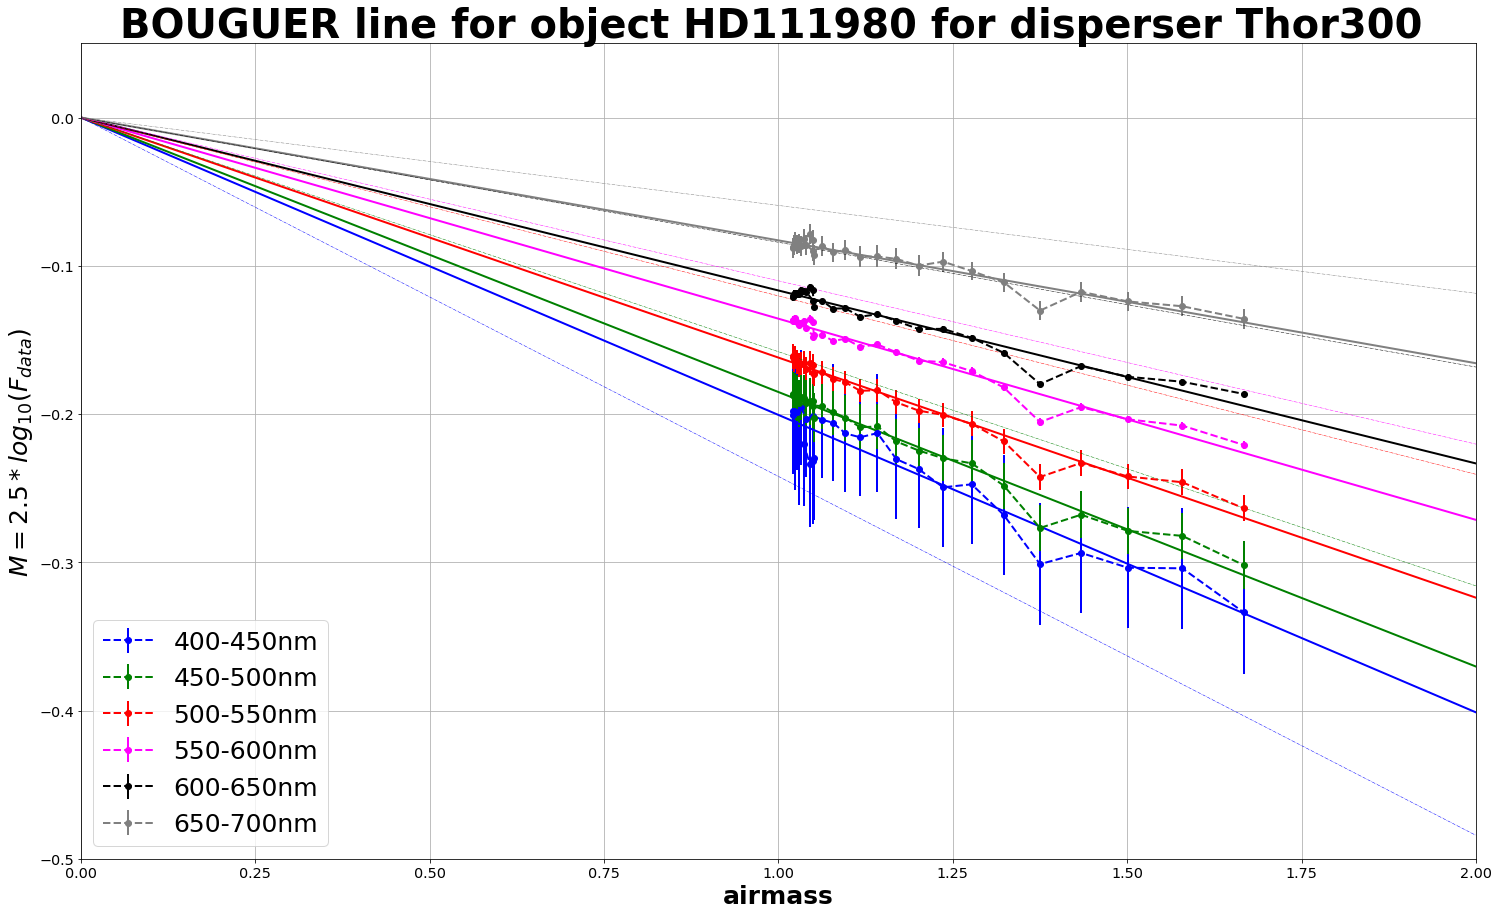

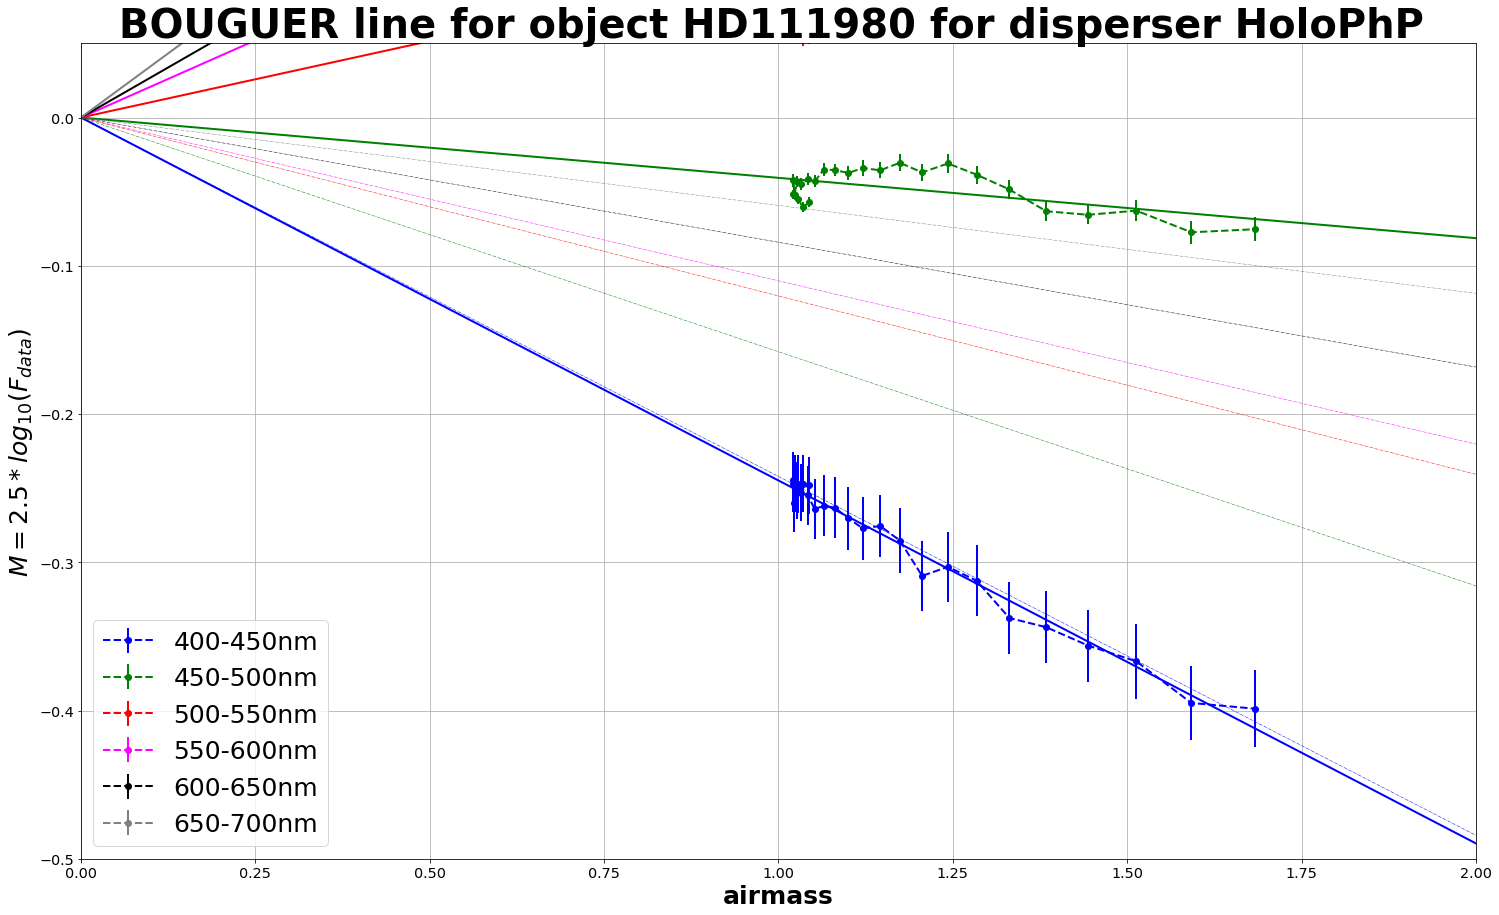

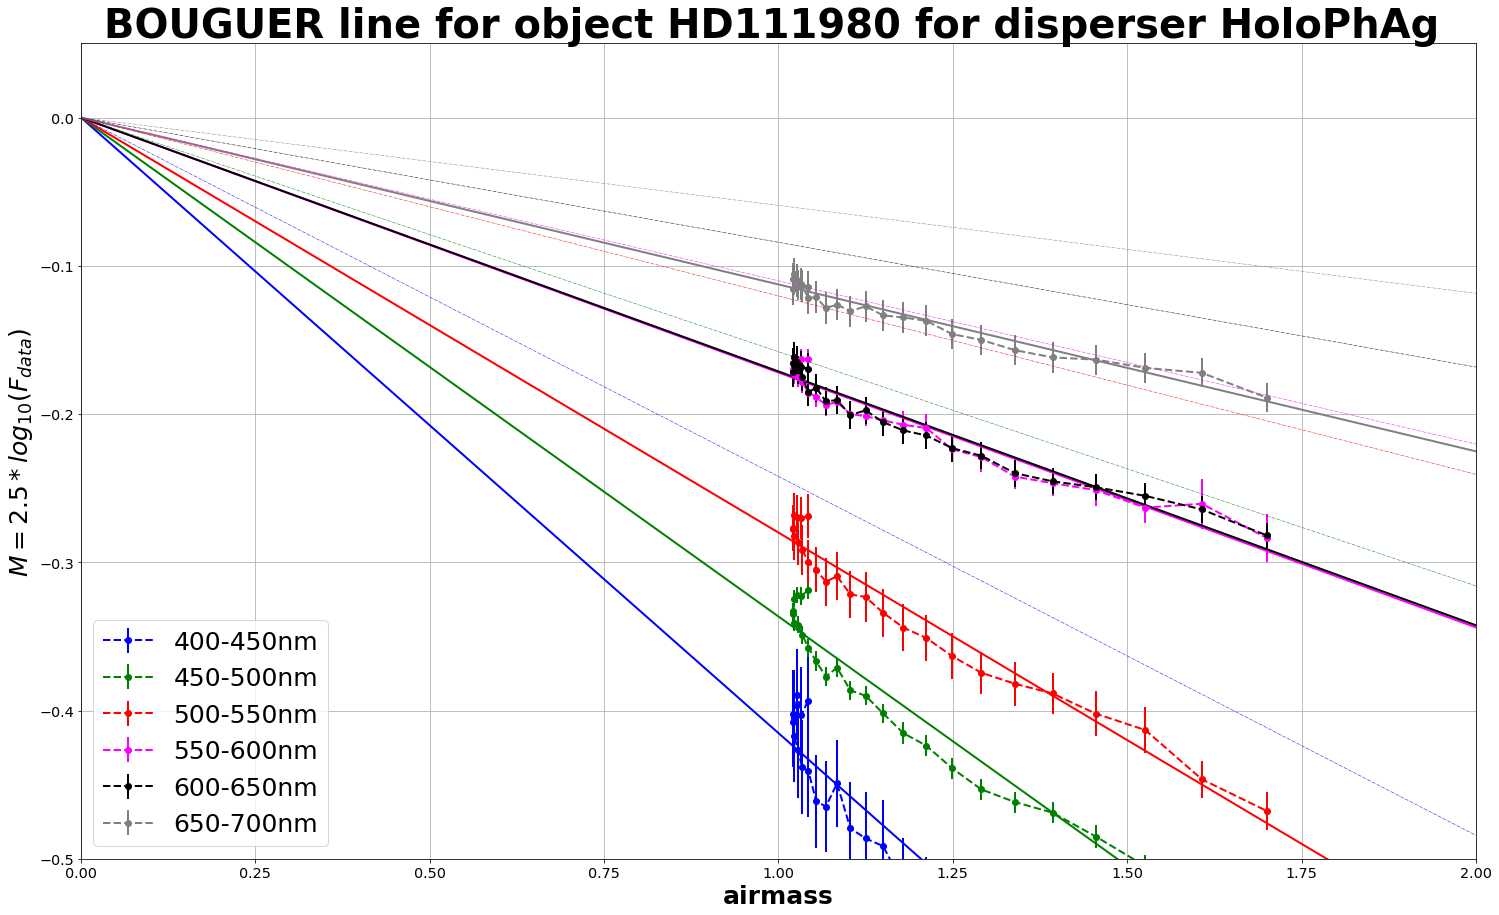

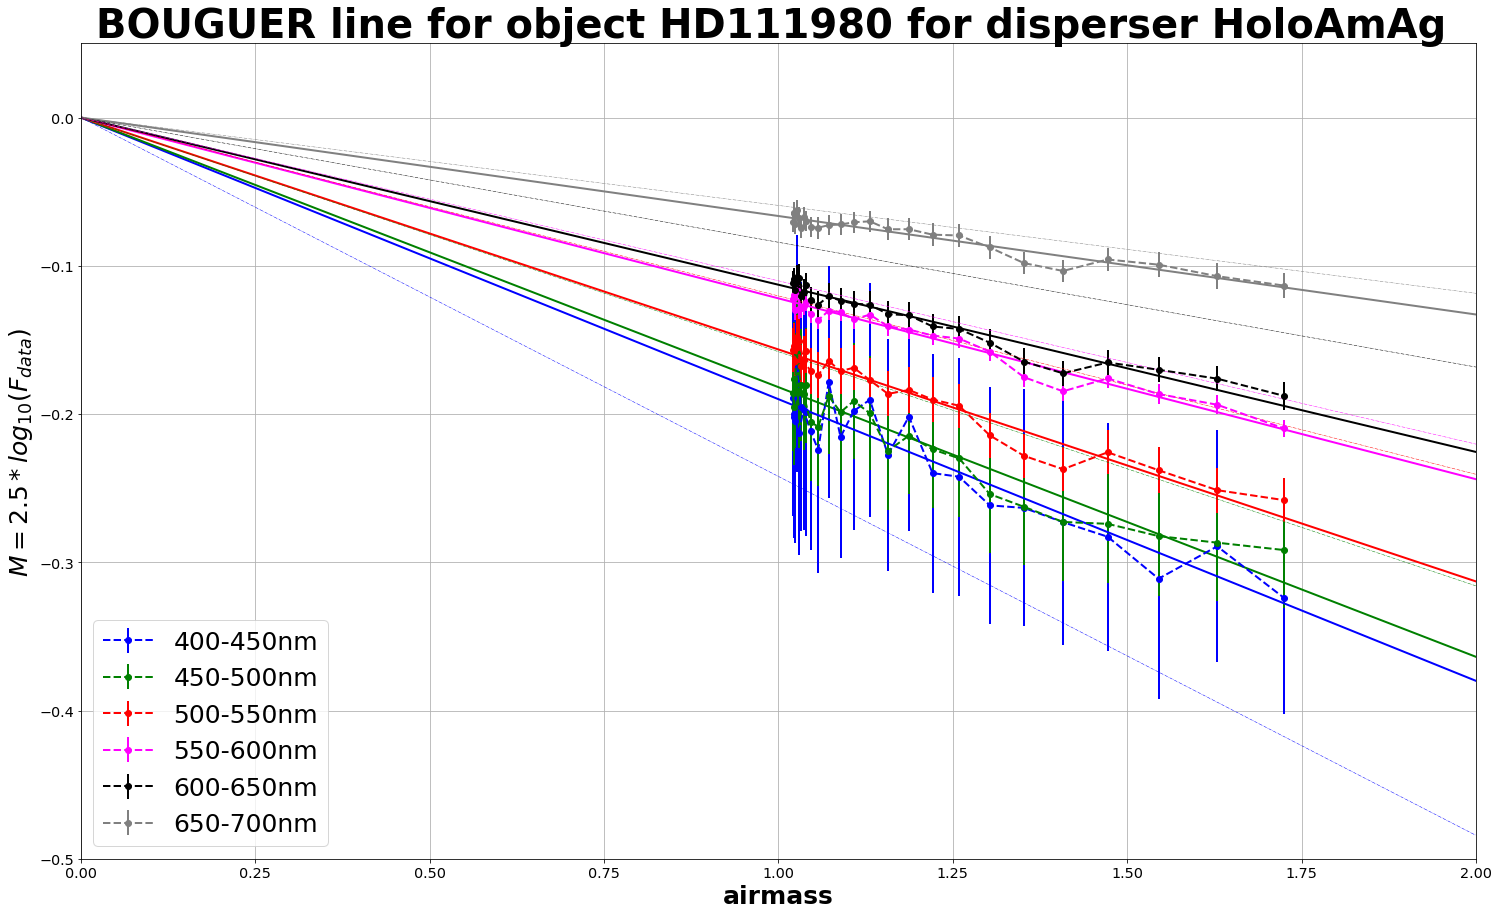

In [43]:
all_fitparamtruebouguer_data2 = []
all_popt_truebouguer_data2 = []
all_perr_truebouguer_data2 = []
all_fitparamtruebouguer_sim2= []

for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        fitparamtruebouguer,popt_truebouguer,perr_truebouguer,fitparamtruebouguer_sim = ShowTrueBouguerDataSim(all_rightspectra_wl,all_rightspectra_data,all_rightspectra_sim_wl,all_rightspectra_sim,all_airmass,all_filt,object_name,dir_top_images,sel_filt=dispname)
        all_fitparamtruebouguer_data2.append(fitparamtruebouguer)
        all_popt_truebouguer_data2.append(popt_truebouguer)
        all_perr_truebouguer_data2.append(perr_truebouguer)
        all_fitparamtruebouguer_sim2.append(fitparamtruebouguer_sim)

## Get the slope value

In [44]:
fitparamtruebouguer_sim

[array([ -0.24209132, -29.97914188]),
 array([ -0.15795888, -29.83638284]),
 array([ -0.12033311, -29.83666281]),
 array([ -0.11014689, -29.84372594]),
 array([ -0.08415159, -29.90055692]),
 array([ -0.05928674, -29.99951255])]

In [45]:
truncpopt_truebouguer=np.trunc(np.array(popt_truebouguer)*10000)/10000
truncperr_truebouguer=np.trunc(np.array(perr_truebouguer)*10000)/10000
truncfitparam_sim=np.trunc(np.array(fitparamtruebouguer_sim)*10000)/10000

In [46]:
table = ListTable()
table.append(["slope-data","error-data","slope-sim"])
for idd in range(0,6):
    table.append([truncpopt_truebouguer[idd][0],truncperr_truebouguer[idd][0],truncfitparam_sim[idd][0]])
table

slope-data,error-data,slope-sim
-0.1902,0.0147,-0.242
-0.1821,0.0116,-0.1579
-0.1566,0.0075,-0.1203
-0.1211,0.0047,-0.1101
-0.1133,0.0055,-0.0841
-0.0671,0.0044,-0.0592


## Fit Rayleigh Scattering

In [66]:
idx=0
all_popt_truebouguer_data[idx]

[array([-0.24984866,  5.87055968]),
 array([-0.19197626,  6.20251773]),
 array([-0.14382041,  6.30366015]),
 array([-0.12417019,  6.40621344]),
 array([-0.10071074,  6.43169719]),
 array([-0.08312327,  6.39785527])]

In [78]:
all_perr_truebouguer_data[idx]

[array([ 0.00607632,  0.00726443]),
 array([ 0.00623036,  0.00753344]),
 array([ 0.00537171,  0.00647984]),
 array([ 0.00414845,  0.00492534]),
 array([ 0.00501533,  0.00591611]),
 array([ 0.00473302,  0.00568485])]

In [68]:
all_fitparamtruebouguer_sim[idx]

[array([ -0.24211148, -29.97911619]),
 array([ -0.15797042, -29.83636848]),
 array([ -0.12034212, -29.83665125]),
 array([ -0.1101523 , -29.84371901]),
 array([ -0.08415339, -29.90055467]),
 array([ -0.05926688, -29.99953373])]

Ron400
-0.360270306405  at 400 nm
Thor300
-0.395923862667  at 400 nm
HoloPhP
-0.259593412276  at 400 nm
HoloPhAg
-0.698897785116  at 400 nm
HoloAmAg
-0.401703891475  at 400 nm


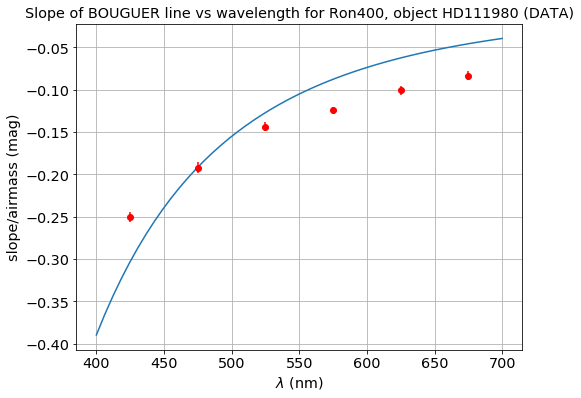

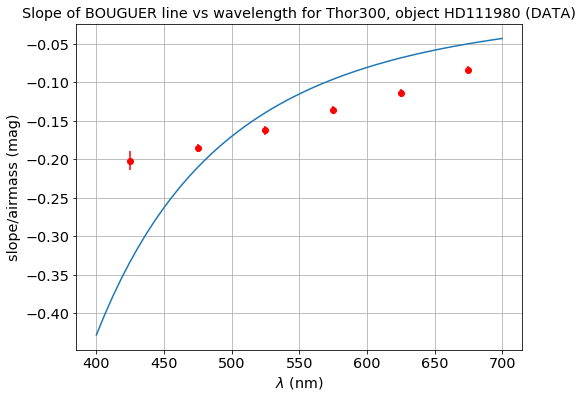

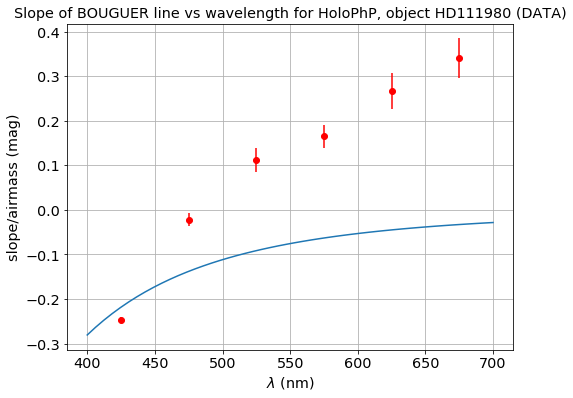

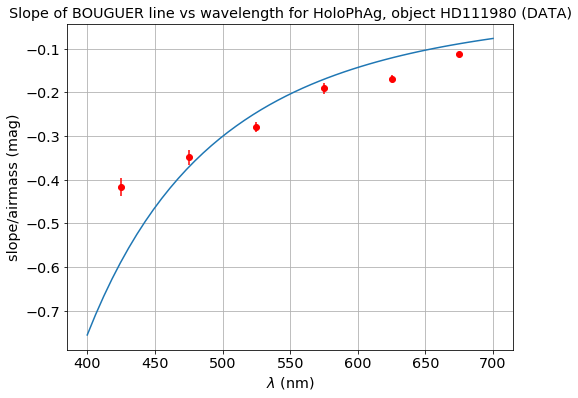

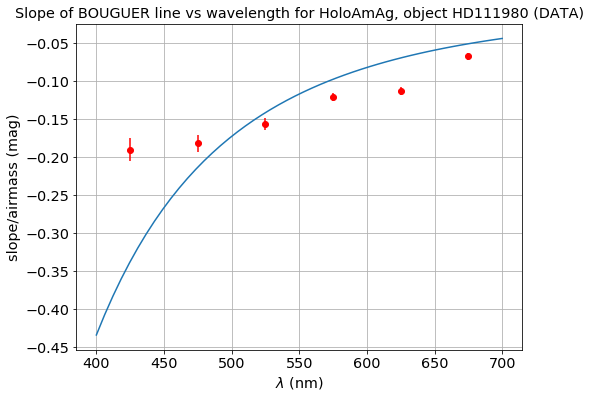

In [70]:
idx=0
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        PlotRayleigh(all_popt_truebouguer_data[idx],all_perr_truebouguer_data[idx],dispname,dir_top_images,object_name,'DATA')
        idx+=1

Ron400
Missing errors
-0.310884747444  at 400 nm
Thor300
Missing errors
-0.310891777965  at 400 nm
HoloPhP
Missing errors
-0.310815121931  at 400 nm
HoloPhAg
Missing errors
-0.310907035211  at 400 nm
HoloAmAg
Missing errors
-0.310814771407  at 400 nm


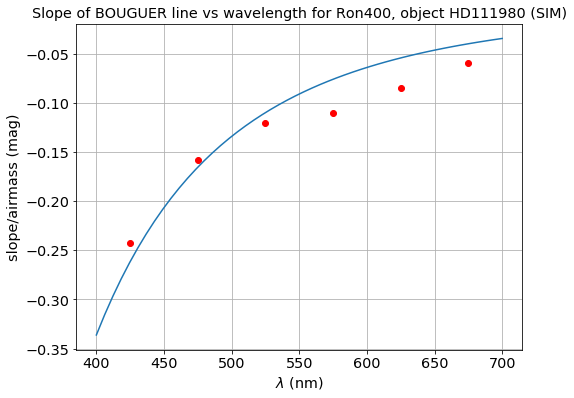

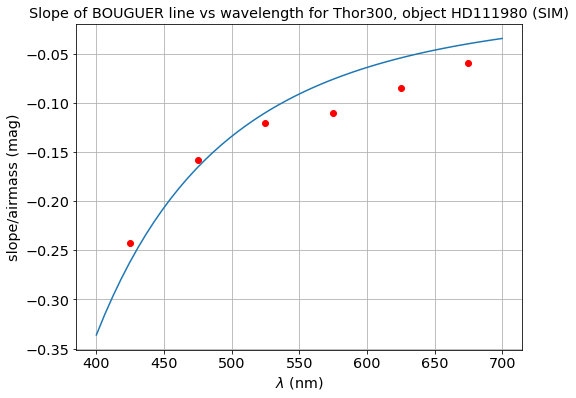

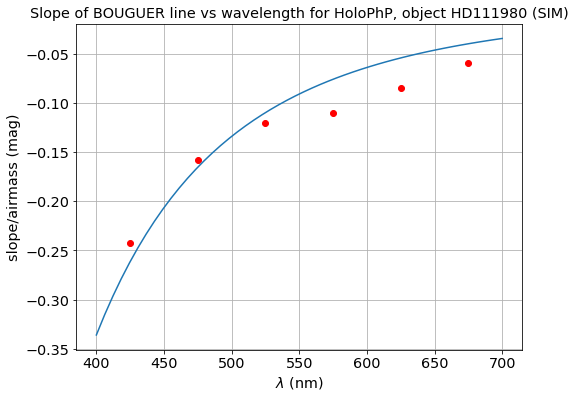

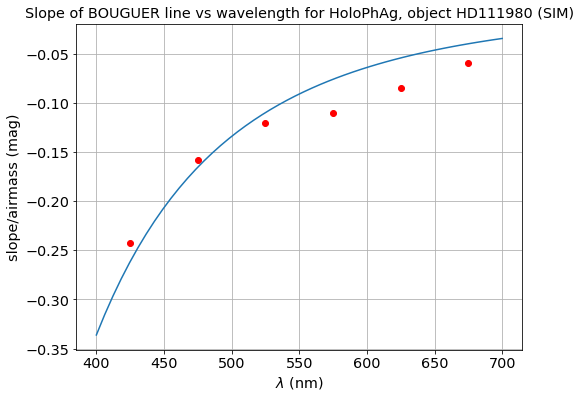

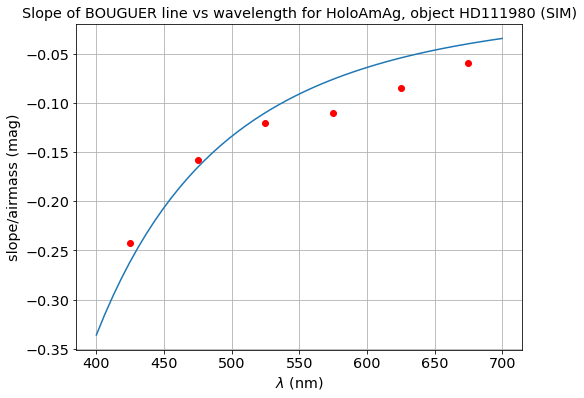

In [90]:
idx=0
for dispname in Disp_names:
    if dispname != 'Ron200' and dispname != 'Unknown':
        print dispname
        PlotRayleigh(all_fitparamtruebouguer_sim[idx],None,dispname,dir_top_images,object_name,'SIM')
        idx+=1

In [37]:
index_airmassmin=np.where(all_airmass==all_airmass.min())[0][0]

In [38]:
index_airmassmin

23

In [39]:
def ShowRatioSpectraNorm(idx,thewl,thespectrum,thesimspec,wlcutmin,all_titles,object_name):
    """
    ShowRatioSpectraNorm: Show the calibration curve Normalisation
    ===============================================================
    
    input parameter :
    - idx : the index of minimum airmass
    - thewl : the list of all wavelengths
    - thespectrum : the list of data spectra
    - thesimspec : the list of simulated spectra
    
    output :
    - ratio wavelength collection
    - R ratio collection
    
    """

    
    XMIN=410.
    XMAX=780.
    
    #XMIN=350.
    #XMAX=800.
    
    YMINR=0.7
    YMAXR=1.1

    
    NBSPECTRA=len(thespectrum)
    
    fig, ax = plt.subplots(1, 1, figsize=(15,6))
    
    # check the spectrum used for normalisation 
    #---------------------------------------------
    ratio_sel0=thespectrum[idx]/thesimspec[idx]
    
    
    
    #interpol_ratio=interp1d(all_rightspectra_wl[idx],ratio_sel0)
    interpol_ratio=interp1d(thewl[idx],ratio_sel0)
    
    #wlcutmax=all_rightspectra_wl[idx].max()-1.
    wlcutmin=XMIN
    wlcutmax=XMAX
    
    #selectedindexes0=np.where(np.logical_and(all_rightspectra_wl[idx]>wlcutmin, all_rightspectra_wl[idx]<wlcutmax))     
    selectedindexes0=np.where(np.logical_and(thewl[idx]>wlcutmin, thewl[idx]<wlcutmax))
    
    #sel_wl0=all_rightspectra_wl[idx][selectedindexes0]  # cut wl
    sel_wl0=thewl[idx][selectedindexes0]
    
    ax.plot(sel_wl0, interpol_ratio(sel_wl0),'r-')
    
    ax.grid(True)
    ax.set_xlim(XMIN,XMAX)
    title='Data/Sim spectra ratio at minimum airmass for object {}'.format(object_name)
    
    ax.set_title(title)
    ax.set_ylabel("ratio Data/Sim")
    ax.set_xlabel("$\lambda$ (nm)")
    
    zam_min=all_airmass[idx]
    print 'minimum airmass zmin = ',zam_min
    
    
    # 2nd plot
    #---------
    fig, ax = plt.subplots(1, 1, figsize=(15,8))

    all_ymin= []
    all_ymax=[]
    all_ratioratio=[]
    all_ratiowl=[]
    all_dzam = []
     
    
    for index in np.arange(0,NBSPECTRA):
        
        #print 'spectrum ',index
        ix=index%5
        iy=index/5
        
        zam=all_airmass[index]
        dzam=zam-zam_min  ## relative airmass
        all_dzam.append(dzam)
        
        #selectedindexes=np.where(np.logical_and(all_rightspectra_wl[index]>wlcutmin, all_rightspectra_wl[index]<wlcutmax))     
        selectedindexes=np.where(np.logical_and(thewl[index]>wlcutmin, thewl[index]<wlcutmax))     
        
        sel_data=thespectrum[index][selectedindexes]
        sel_sim=thesimspec[index][selectedindexes]
        sel_wl=thewl[index][selectedindexes]
                
        
        ratio=sel_data/sel_sim
        ratio0=interpol_ratio(sel_wl)
        
        ratioratio=ratio/ratio0
        
        all_ymin.append(ratioratio.min())
        all_ymax.append(ratioratio.max())
        all_ratioratio.append(ratioratio)
        all_ratiowl.append(sel_wl)
           
        if all_expo[index]>0.:    
            ax.plot(sel_wl,ratioratio,'-',lw=2)
       
            ymin=np.array(all_ymin).min() 
            ymax=np.array(all_ymax).max()*1.1   
        
    ax.set_xlim(XMIN,XMAX)
    ax.set_ylim(YMINR,YMAXR)
    
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    
    ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
    ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
    ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=1)
    ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=1)
    ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=1)
    ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=1)
    #ax.legend(loc='best',fontsize=20)
    title='Normalised Data/Sim spectra for object {}'.format(object_name)
    
    ax.set_title(title)
    ax.set_ylabel("ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'DataSimNormDataSimRRatio.pdf')
    
    plt.savefig(figfilename)
    return np.array(all_ratiowl),np.array(all_ratioratio), np.array(all_dzam)
    return all_ratiowl,all_ratioratio, all_dzam


### Return the ratio

In [40]:
all_ratiowl_cut,all_ratioratio_cut,all_dzam_cut=ShowRatioSpectraNorm(index_airmassmin,all_selected_wl,all_selected_dataspectrum,all_selected_simspectrum,wlcut,all_titles,object_name)

NameError: name 'all_selected_wl' is not defined

In [ ]:
#all_ratiowl_full,all_ratioratio_full,all_dzam_full=ShowRatioSpectraNorm(index_airmassmin,all_rightspectra_wl,all_rightspectra_data,all_rightspectra_sim,wlcut,all_titles,object_name)

## Bouguer Law

In [ ]:
def ShowModifBouguer(idxzmin,thewl,theratio,thedzam):
    """
    ShowModifBouguer:
    
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(6,8))
    
    zmin=all_airmass[idxzmin]
    NBBands=6
    labels=["400-450nm", "450-500nm","500-550nm","550-600nm","600-650nm","650-700nm"]
    WLMINAbs=np.array([400.,450.,500.,550,600,650])
    WLMAXAbs=np.array([450.,500.,550.,600,650,700])
    
    NBRATIO=len(theratio)
    
    all_z = []
    all_log10R1vsZ = []
    all_log10R2vsZ = []
    all_log10R3vsZ = []
    all_log10R4vsZ = []
    all_log10R5vsZ = []
    all_log10R6vsZ = []
    all_log10R1vsZE = []
    all_log10R2vsZE = []
    all_log10R3vsZE = []
    all_log10R4vsZE = []
    all_log10R5vsZE = []
    all_log10R6vsZE = []
    
    # loop on ratio
    for index in np.arange(NBRATIO):
        
        if all_expo[index]>0.: 
        
            thez=thedzam[index]+zmin
              
            wl_current=thewl[index]
            wl_ratio=theratio[index]
        
            nbwl=wl_current.shape[0]
        
            band1=np.where(np.logical_and(wl_current>= WLMINAbs[0],wl_current<WLMAXAbs[0]))
            band2=np.where(np.logical_and(wl_current>= WLMINAbs[1],wl_current<WLMAXAbs[1]))    
            band3=np.where(np.logical_and(wl_current>= WLMINAbs[2],wl_current<WLMAXAbs[2])) 
            band4=np.where(np.logical_and(wl_current>= WLMINAbs[3],wl_current<WLMAXAbs[3])) 
            band5=np.where(np.logical_and(wl_current>= WLMINAbs[4],wl_current<WLMAXAbs[4])) 
            band6=np.where(np.logical_and(wl_current>= WLMINAbs[5],wl_current<WLMAXAbs[5])) 
        
            all_R1=wl_ratio[band1]
            all_R2=wl_ratio[band2]
            all_R3=wl_ratio[band3]
            all_R4=wl_ratio[band4]
            all_R5=wl_ratio[band5]
            all_R6=wl_ratio[band6]
        
            all_log10R1 = 2.5*np.log10(all_R1)
            all_log10R2 = 2.5*np.log10(all_R2)
            all_log10R3 = 2.5*np.log10(all_R3)
            all_log10R4 = 2.5*np.log10(all_R4)
            all_log10R5 = 2.5*np.log10(all_R5)
            all_log10R6 = 2.5*np.log10(all_R6)
    
            all_z.append(thez)
            all_log10R1vsZ.append(np.average(all_log10R1))
            all_log10R2vsZ.append(np.average(all_log10R2))
            all_log10R3vsZ.append(np.average(all_log10R3))
            all_log10R4vsZ.append(np.average(all_log10R4))
            all_log10R5vsZ.append(np.average(all_log10R5))
            all_log10R6vsZ.append(np.average(all_log10R6))
            
            all_log10R1vsZE.append(np.std(all_log10R1)/np.sqrt(all_log10R1.shape[0]))
            all_log10R2vsZE.append(np.std(all_log10R2)/np.sqrt(all_log10R2.shape[0]))
            all_log10R3vsZE.append(np.std(all_log10R3)/np.sqrt(all_log10R3.shape[0]))
            all_log10R4vsZE.append(np.std(all_log10R4)/np.sqrt(all_log10R4.shape[0]))
            all_log10R5vsZE.append(np.std(all_log10R5)/np.sqrt(all_log10R5.shape[0]))
            all_log10R6vsZE.append(np.std(all_log10R6)/np.sqrt(all_log10R6.shape[0]))
        
    ax.errorbar(all_z,all_log10R1vsZ,yerr=all_log10R1vsZE,fmt='--o',color='blue',label=labels[0])
    ax.errorbar(all_z,all_log10R2vsZ,yerr=all_log10R2vsZE,fmt='--o',color='green',label=labels[1])
    ax.errorbar(all_z,all_log10R3vsZ,yerr=all_log10R3vsZE,fmt='--o',color='red',label=labels[2])
    ax.errorbar(all_z,all_log10R4vsZ,yerr=all_log10R4vsZE,fmt='--o',color='magenta',label=labels[3])
    ax.errorbar(all_z,all_log10R5vsZ,yerr=all_log10R5vsZE,fmt='--o',color='black',label=labels[4])
    ax.errorbar(all_z,all_log10R6vsZ,yerr=all_log10R6vsZE,fmt='--o',color='grey',label=labels[5])  
    
    #ax.plot(all_z,all_log10R1vsZ,'o-',label=labels[0])
    #ax.plot(all_z,all_log10R2vsZ,'o-',label=labels[1])
    #ax.plot(all_z,all_log10R3vsZ,'o-',label=labels[2])
    #ax.plot(all_z,all_log10R4vsZ,'o-',label=labels[3])
    #ax.plot(all_z,all_log10R5vsZ,'o-',label=labels[4])
    #ax.plot(all_z,all_log10R6vsZ,'o-',label=labels[5])
    
    ax.grid(True)
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', colo1r='k', linewidth=2.0)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5) 
    title="Modified BOUGUER line for object {}".format(object_name)
    ax.set_title(title)
    ax.set_xlabel("airmass")
    ax.set_ylabel("$\Delta M=2.5*log_{10}(R)=2.5*log_{10}(F_{data}/F_{sim})$ (mag)")
    ax.legend(loc="best")
    figfilename=os.path.join(dir_top_images,'modified_bouguerE1.pdf')
    plt.savefig(figfilename)
    

In [ ]:
ShowModifBouguer(index_airmassmin,all_ratiowl_cut,all_ratioratio_cut,all_dzam_cut)

In [ ]:
def ShowModifBouguer2(idxzmin,thewl,theratio,thedzam):
    """
    ShowModifBouguer2:
    
    """
    
    fig, ax = plt.subplots(1, 1, figsize=(6,8))
    
    zmin=all_airmass[idxzmin]
    NBBands=6
    labels=["400-450nm", "450-500nm","500-550nm","550-600nm","600-650nm","650-700nm"]
    WLMINAbs=np.array([400.,450.,500.,550,600,650])
    WLMAXAbs=np.array([450.,500.,550.,600,650,700])
    
    NBRATIO=len(theratio)
    
    all_z = []
    all_log10R1vsZ = []
    all_log10R2vsZ = []
    all_log10R3vsZ = []
    all_log10R4vsZ = []
    all_log10R5vsZ = []
    all_log10R6vsZ = []
    
    all_log10R1vsZE = []
    all_log10R2vsZE = []
    all_log10R3vsZE = []
    all_log10R4vsZE = []
    all_log10R5vsZE = []
    all_log10R6vsZE = []
    
    # loop on ratio
    for index in np.arange(NBRATIO):
        
        if all_expo[index]>0.: 
        
            thez=thedzam[index]+zmin
              
            wl_current=thewl[index]
            wl_ratio=theratio[index]
        
            nbwl=wl_current.shape[0]
        
            band1=np.where(np.logical_and(wl_current>= WLMINAbs[0],wl_current<WLMAXAbs[0]))
            band2=np.where(np.logical_and(wl_current>= WLMINAbs[1],wl_current<WLMAXAbs[1]))    
            band3=np.where(np.logical_and(wl_current>= WLMINAbs[2],wl_current<WLMAXAbs[2])) 
            band4=np.where(np.logical_and(wl_current>= WLMINAbs[3],wl_current<WLMAXAbs[3])) 
            band5=np.where(np.logical_and(wl_current>= WLMINAbs[4],wl_current<WLMAXAbs[4])) 
            band6=np.where(np.logical_and(wl_current>= WLMINAbs[5],wl_current<WLMAXAbs[5])) 
        
            all_R1=wl_ratio[band1]
            all_R2=wl_ratio[band2]
            all_R3=wl_ratio[band3]
            all_R4=wl_ratio[band4]
            all_R5=wl_ratio[band5]
            all_R6=wl_ratio[band6]
        
            all_log10R1 = 2.5*np.log10(all_R1)
            all_log10R2 = 2.5*np.log10(all_R2)
            all_log10R3 = 2.5*np.log10(all_R3)
            all_log10R4 = 2.5*np.log10(all_R4)
            all_log10R5 = 2.5*np.log10(all_R5)
            all_log10R6 = 2.5*np.log10(all_R6)
    
            all_z.append(thez)
            all_log10R1vsZ.append(np.average(all_log10R1))
            all_log10R2vsZ.append(np.average(all_log10R2))
            all_log10R3vsZ.append(np.average(all_log10R3))
            all_log10R4vsZ.append(np.average(all_log10R4))
            all_log10R5vsZ.append(np.average(all_log10R5))
            all_log10R6vsZ.append(np.average(all_log10R6))
            
            all_log10R1vsZE.append(np.std(all_log10R1))
            all_log10R2vsZE.append(np.std(all_log10R2))
            all_log10R3vsZE.append(np.std(all_log10R3))
            all_log10R4vsZE.append(np.std(all_log10R4))
            all_log10R5vsZE.append(np.std(all_log10R5))
            all_log10R6vsZE.append(np.std(all_log10R6))
        
        
    ax.errorbar(all_z,all_log10R1vsZ,yerr=all_log10R1vsZE,fmt='--o',color='blue',label=labels[0])
    ax.errorbar(all_z,all_log10R2vsZ,yerr=all_log10R2vsZE,fmt='--o',color='green',label=labels[1])
    ax.errorbar(all_z,all_log10R3vsZ,yerr=all_log10R3vsZE,fmt='--o',color='red',label=labels[2])
    ax.errorbar(all_z,all_log10R4vsZ,yerr=all_log10R4vsZE,fmt='--o',color='magenta',label=labels[3])
    ax.errorbar(all_z,all_log10R5vsZ,yerr=all_log10R5vsZE,fmt='--o',color='black',label=labels[4])
    ax.errorbar(all_z,all_log10R6vsZ,yerr=all_log10R6vsZE,fmt='--o',color='grey',label=labels[5])
    #ax.plot(all_z,all_log10R2vsZ,'o-',label=labels[1])
    #ax.plot(all_z,all_log10R3vsZ,'o-',label=labels[2])
    #ax.plot(all_z,all_log10R4vsZ,'o-',label=labels[3])
    #ax.plot(all_z,all_log10R5vsZ,'o-',label=labels[4])
    #ax.plot(all_z,all_log10R6vsZ,'o-',label=labels[5])
    
    ax.grid(True)
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', colo1r='k', linewidth=2.0)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5) 
    title="Modified BOUGUER curve for object {}".format(object_name)
    ax.set_title(title)
    ax.set_xlabel("airmass")
    ax.set_ylabel("$\Delta M=2.5*log_{10}(R)=2.5*log_{10}(F_{data}/F_{sim})$ (mag)")
    ax.legend(loc="best")
    figfilename=os.path.join(dir_top_images,'modified_bouguerE2.pdf')
    plt.savefig(figfilename)
    

In [ ]:
ShowModifBouguer2(index_airmassmin,all_ratiowl_cut,all_ratioratio_cut,all_dzam_cut)

In [ ]:
def SimpleLinearFitBouguer(idxzmin,thewl,theratio,thedzam):
    """
    FitBouguer:
    
    """
    
    ZCUT=1.59
    
    fig, ax = plt.subplots(1, 1, figsize=(6,8))
    
    zmin=all_airmass[idxzmin]
    
    NBBands=6
    labels=["400-450nm", "450-500nm","500-550nm","550-600nm","600-650nm","650-700nm"]
    WLMINAbs=np.array([400.,450.,500.,550,600,650])
    WLMAXAbs=np.array([450.,500.,550.,600,650,700])
    
    NBRATIO=len(theratio)
    
    all_z1 = []
    all_log10R1vsZ1 = []
    all_log10R2vsZ1 = []
    all_log10R3vsZ1 = []
    all_log10R4vsZ1 = []
    all_log10R5vsZ1 = []
    all_log10R6vsZ1 = []
    
    all_z2 = []
    all_log10R1vsZ2 = []
    all_log10R2vsZ2 = []
    all_log10R3vsZ2 = []
    all_log10R4vsZ2 = []
    all_log10R5vsZ2 = []
    all_log10R6vsZ2 = []
    
    fitparam1 = []
    fitparam2 = []
    y1fit = []
    y2fit = []
    x1fit=np.linspace(1.,ZCUT,50)
    x2fit=np.linspace(ZCUT,2.0,50)
    # loop on ratio
    #---------------
    for index in np.arange(NBRATIO):
        
        if all_expo[index]>0.: 
        
            thez=thedzam[index]+zmin
              
            wl_current=thewl[index]
            wl_ratio=theratio[index]
        
            nbwl=wl_current.shape[0]
        
            band1=np.where(np.logical_and(wl_current>= WLMINAbs[0],wl_current<WLMAXAbs[0]))
            band2=np.where(np.logical_and(wl_current>= WLMINAbs[1],wl_current<WLMAXAbs[1]))    
            band3=np.where(np.logical_and(wl_current>= WLMINAbs[2],wl_current<WLMAXAbs[2])) 
            band4=np.where(np.logical_and(wl_current>= WLMINAbs[3],wl_current<WLMAXAbs[3])) 
            band5=np.where(np.logical_and(wl_current>= WLMINAbs[4],wl_current<WLMAXAbs[4])) 
            band6=np.where(np.logical_and(wl_current>= WLMINAbs[5],wl_current<WLMAXAbs[5])) 
                
            all_R1=wl_ratio[band1]
            all_R2=wl_ratio[band2]
            all_R3=wl_ratio[band3]
            all_R4=wl_ratio[band4]
            all_R5=wl_ratio[band5]
            all_R6=wl_ratio[band6]
            
            all_log10R1 = 2.5*np.log10(all_R1)
            all_log10R2 = 2.5*np.log10(all_R2)
            all_log10R3 = 2.5*np.log10(all_R3)
            all_log10R4 = 2.5*np.log10(all_R4)
            all_log10R5 = 2.5*np.log10(all_R5)
            all_log10R6 = 2.5*np.log10(all_R6)
            
            if(thez<=ZCUT):  
                all_z1.append(thez)
                all_log10R1vsZ1.append(np.average(all_log10R1))
                all_log10R2vsZ1.append(np.average(all_log10R2))
                all_log10R3vsZ1.append(np.average(all_log10R3))
                all_log10R4vsZ1.append(np.average(all_log10R4))
                all_log10R5vsZ1.append(np.average(all_log10R5))
                all_log10R6vsZ1.append(np.average(all_log10R6))
            else:
                all_z2.append(thez)
                all_log10R1vsZ2.append(np.average(all_log10R1))
                all_log10R2vsZ2.append(np.average(all_log10R2))
                all_log10R3vsZ2.append(np.average(all_log10R3))
                all_log10R4vsZ2.append(np.average(all_log10R4))
                all_log10R5vsZ2.append(np.average(all_log10R5))
                all_log10R6vsZ2.append(np.average(all_log10R6))
    
    
    x1=np.array(all_z1) 
    
    for iband in np.arange(NBBands):
        if iband==0:
            y=np.array(all_log10R1vsZ1)
        elif iband ==1:
            y=np.array(all_log10R2vsZ1)
        elif iband==2:
            y=np.array(all_log10R3vsZ1)
        elif iband ==3:
            y=np.array(all_log10R4vsZ1) 
        elif iband==4:
            y=np.array(all_log10R5vsZ1)
        elif iband ==5:
            y=np.array(all_log10R6vsZ1) 
            
        z1 = np.polyfit(x1, y, 1)
        fitparam1.append(z1)    
        p1 = np.poly1d(z1)
        yfit=p1(x1fit)
        y1fit.append(yfit)
        
    x2=np.array(all_z2)
    
    for iband in np.arange(NBBands):
        if iband==0:
            y=np.array(all_log10R1vsZ2)
        elif iband ==1:
            y=np.array(all_log10R2vsZ2)
        elif iband==2:
            y=np.array(all_log10R3vsZ2)
        elif iband ==3:
            y=np.array(all_log10R4vsZ2) 
        elif iband==4:
            y=np.array(all_log10R5vsZ2)
        elif iband ==5:
            y=np.array(all_log10R6vsZ2)            
        z2 = np.polyfit(x2, y, 1)
        fitparam2.append(z2)    
        p2 = np.poly1d(z2)
        yfit=p2(x2fit)
        y2fit.append(yfit)
                
    xfit=np.append(x1fit,x2fit)
    
    yfit=np.append(y1fit[0],y2fit[0])
    yfit=yfit-yfit[0] 
    ax.plot(xfit,yfit,'b-',lw=2,label=labels[0])
    
     
    yfit=np.append(y1fit[1],y2fit[1])
    yfit=yfit-yfit[1] 
    ax.plot(xfit,yfit,'r-',lw=2,label=labels[1])
    
    yfit=np.append(y1fit[2],y2fit[2])
    yfit=yfit-yfit[2] 
    ax.plot(xfit,yfit,'g-',lw=2,label=labels[2])
    
    yfit=np.append(y1fit[3],y2fit[3])
    yfit=yfit-yfit[3] 
    ax.plot(xfit,yfit,'k-',lw=2,label=labels[3])
    
    yfit=np.append(y1fit[4],y2fit[4])
    yfit=yfit-yfit[4] 
    ax.plot(xfit,yfit,'c-',lw=2,label=labels[4])
    
    yfit=np.append(y1fit[5],y2fit[5])
    yfit=yfit-yfit[5] 
    ax.plot(xfit,yfit,'y-',lw=2,label=labels[5])
    
    
    #ax.plot(xfit,np.append(y1fit[1],y2fit[1]),'r-',lw=2,label=labels[1])
    #ax.plot(xfit,np.append(y1fit[2],y2fit[2]),'g-',lw=2,label=labels[2])
    #ax.plot(xfit,np.append(y1fit[3],y2fit[3]),'k-',lw=2,label=labels[3])
    #ax.plot(xfit,np.append(y1fit[4],y2fit[4]),'c-',lw=2,label=labels[4])
    #ax.plot(xfit,np.append(y1fit[5],y2fit[5]),'y-',lw=2,label=labels[5])
    
    
    #ax.plot(xfit,y1fit[2],'g-',label=labels[2])
    #ax.plot(xfit,y1fit[3],'k-',label=labels[3])
    #ax.plot(xfit,y1fit[4],'c-',label=labels[4])
    #ax.plot(xfit,y1fit[5],'y-',label=labels[5])
    
    #ax.plot(x2fit,y2fit[0],'b-')
    #ax.plot(x2fit,y2fit[1],'r-')
    #ax.plot(x2fit,y2fit[2],'g-')
    #ax.plot(x2fit,y2fit[3],'k-')
    #ax.plot(x2fit,y2fit[4],'c-')
    #ax.plot(x2fit,y2fit[5],'y-')
    
    
    ax.grid(True)
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    
    #ax.grid(b=True, which='major', colo1r='k', linewidth=2.0)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5) 
    title="Simple Fit BOUGUER lines for object {}".format(object_name)
    ax.set_title(title)
    ax.set_xlabel("airmass")
    ax.set_ylabel("$\Delta M=2.5*log_{10}(R)=2.5*log_{10}(F_{data}/F_{sim})$ (mag)")
    ax.legend(loc="best")
    figfilename=os.path.join(dir_top_images,'fitbougher1.pdf')
    plt.savefig(figfilename)
    return np.array(fitparam1),np.array(fitparam2)
    

In [ ]:
fitparam1_cut,fitparam2_cut=SimpleLinearFitBouguer(index_airmassmin,all_ratiowl_cut,all_ratioratio_cut,all_dzam_cut)

In [ ]:
truncfitparam1_cut=np.trunc(np.array(fitparam1_cut)*10000)/10000
truncfitparam2_cut=np.trunc(np.array(fitparam2_cut)*10000)/10000

In [ ]:
table = ListTable()
table.append(["slope (z<1.59)","slope (z>1.59)"])
for idd in range(0,6):
    table.append([truncfitparam1_cut[idd][0],truncfitparam2_cut[idd][0]])
table

In [ ]:
WLarr=np.array([425.,475.,525.,575.,625.,675.])
plt.plot(500/WLarr,fitparam1_cut[:,1] ,'o',color='blue')
plt.plot(500/WLarr,fitparam2_cut[:,1] ,'s',color='red')
plt.grid(True)
plt.xlabel("500nm/$\lambda (nm)$")

In [ ]:
# import numpy.polynomial.polynomial.polyfit as polyfitw

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
#def bougline(x, a, b):
#    return a*x + b

In [ ]:
def FitABouguerLine(thex,they,theey):
    
    x=np.copy(thex)
    y=np.copy(they)
    ey=np.copy(theey)
    z = np.polyfit(x,y, 1)    
    popt, pcov = curve_fit(bougline,x,y,p0=z,sigma=ey)
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

In [ ]:
def FitBouguer2(idxzmin,thewl,theratio,thedzam):
    """
    FitBouguer2:
    
    """
    
    ZCUT=1.59
    
    fig, ax = plt.subplots(1, 1, figsize=(6,8))
    
    zmin=all_airmass[idxzmin]
    NBBands=6
    labels=["400-450nm", "450-500nm","500-550nm","550-600nm","600-650nm","650-700nm"]
    WLMINAbs=np.array([400.,450.,500.,550,600,650])
    WLMAXAbs=np.array([450.,500.,550.,600,650,700])
    
    NBRATIO=len(theratio)
    
    all_z = []
    all_log10R1vsZ = []
    all_log10R2vsZ = []
    all_log10R3vsZ = []
    all_log10R4vsZ = []
    all_log10R5vsZ = []
    all_log10R6vsZ = []
    
    all_log10R1vsZE = []
    all_log10R2vsZE = []
    all_log10R3vsZE = []
    all_log10R4vsZE = []
    all_log10R5vsZE = []
    all_log10R6vsZE = []
    
    
    all_z1 = []
    all_log10R1vsZ1 = []
    all_log10R2vsZ1 = []
    all_log10R3vsZ1 = []
    all_log10R4vsZ1 = []
    all_log10R5vsZ1 = []
    all_log10R6vsZ1 = []
    
    all_log10R1vsZ1E = []
    all_log10R2vsZ1E = []
    all_log10R3vsZ1E = []
    all_log10R4vsZ1E = []
    all_log10R5vsZ1E = []
    all_log10R6vsZ1E = []
    
    
    all_z2 = []
    all_log10R1vsZ2 = []
    all_log10R2vsZ2 = []
    all_log10R3vsZ2 = []
    all_log10R4vsZ2 = []
    all_log10R5vsZ2 = []
    all_log10R6vsZ2 = []
    
    all_log10R1vsZ2E = []
    all_log10R2vsZ2E = []
    all_log10R3vsZ2E = []
    all_log10R4vsZ2E = []
    all_log10R5vsZ2E = []
    all_log10R6vsZ2E = []
    
    fitparam1 = []
    fitparam2 = []
    
    fitparam1err = []
    fitparam2err = []
    
    x1fit=np.linspace(1.,ZCUT,50)
    x2fit=np.linspace(ZCUT,2.0,50)
    
    
    # loop on ratio to compute arerage and error points, that is to say, on the airmass z
    for index in np.arange(NBRATIO):
        
        if all_expo[index]>0: 
        
            thez=thedzam[index]+zmin
            
           
              
            wl_current=thewl[index]
            wl_ratio=theratio[index]
        
            nbwl=wl_current.shape[0]
        
            band1=np.where(np.logical_and(wl_current>= WLMINAbs[0],wl_current<WLMAXAbs[0]))
            band2=np.where(np.logical_and(wl_current>= WLMINAbs[1],wl_current<WLMAXAbs[1]))    
            band3=np.where(np.logical_and(wl_current>= WLMINAbs[2],wl_current<WLMAXAbs[2])) 
            band4=np.where(np.logical_and(wl_current>= WLMINAbs[3],wl_current<WLMAXAbs[3])) 
            band5=np.where(np.logical_and(wl_current>= WLMINAbs[4],wl_current<WLMAXAbs[4])) 
            band6=np.where(np.logical_and(wl_current>= WLMINAbs[5],wl_current<WLMAXAbs[5])) 
        
            all_R1=wl_ratio[band1]
            all_R2=wl_ratio[band2]
            all_R3=wl_ratio[band3]
            all_R4=wl_ratio[band4]
            all_R5=wl_ratio[band5]
            all_R6=wl_ratio[band6]
        
            all_log10R1 = 2.5*np.log10(all_R1)
            all_log10R2 = 2.5*np.log10(all_R2)
            all_log10R3 = 2.5*np.log10(all_R3)
            all_log10R4 = 2.5*np.log10(all_R4)
            all_log10R5 = 2.5*np.log10(all_R5)
            all_log10R6 = 2.5*np.log10(all_R6)
    
            all_z.append(thez)
            all_log10R1vsZ.append(np.average(all_log10R1))
            all_log10R2vsZ.append(np.average(all_log10R2))
            all_log10R3vsZ.append(np.average(all_log10R3))
            all_log10R4vsZ.append(np.average(all_log10R4))
            all_log10R5vsZ.append(np.average(all_log10R5))
            all_log10R6vsZ.append(np.average(all_log10R6))
            
            all_log10R1vsZE.append(np.std(all_log10R1)/np.sqrt(all_log10R1.shape[0]))
            all_log10R2vsZE.append(np.std(all_log10R2)/np.sqrt(all_log10R2.shape[0]))
            all_log10R3vsZE.append(np.std(all_log10R3)/np.sqrt(all_log10R3.shape[0]))
            all_log10R4vsZE.append(np.std(all_log10R4)/np.sqrt(all_log10R4.shape[0]))
            all_log10R5vsZE.append(np.std(all_log10R5)/np.sqrt(all_log10R5.shape[0]))
            all_log10R6vsZE.append(np.std(all_log10R6)/np.sqrt(all_log10R6.shape[0]))
            
           
            # separate according the conditions depending on Z
            #--------------------------------------------------
            if thez<=ZCUT:  
                all_z1.append(thez)
                all_log10R1vsZ1.append(np.average(all_log10R1))
                all_log10R2vsZ1.append(np.average(all_log10R2))
                all_log10R3vsZ1.append(np.average(all_log10R3))
                all_log10R4vsZ1.append(np.average(all_log10R4))
                all_log10R5vsZ1.append(np.average(all_log10R5))
                all_log10R6vsZ1.append(np.average(all_log10R6))
                
                all_log10R1vsZ1E.append(np.std(all_log10R1)/np.sqrt(all_log10R1.shape[0]))
                all_log10R2vsZ1E.append(np.std(all_log10R2)/np.sqrt(all_log10R2.shape[0]))
                all_log10R3vsZ1E.append(np.std(all_log10R3)/np.sqrt(all_log10R3.shape[0]))
                all_log10R4vsZ1E.append(np.std(all_log10R4)/np.sqrt(all_log10R4.shape[0]))
                all_log10R5vsZ1E.append(np.std(all_log10R5)/np.sqrt(all_log10R5.shape[0]))
                all_log10R6vsZ1E.append(np.std(all_log10R6)/np.sqrt(all_log10R6.shape[0]))
            else:
                all_z2.append(thez)
                all_log10R1vsZ2.append(np.average(all_log10R1))
                all_log10R2vsZ2.append(np.average(all_log10R2))
                all_log10R3vsZ2.append(np.average(all_log10R3))
                all_log10R4vsZ2.append(np.average(all_log10R4))
                all_log10R5vsZ2.append(np.average(all_log10R5))
                all_log10R6vsZ2.append(np.average(all_log10R6))
                
                all_log10R1vsZ2E.append(np.std(all_log10R1)/np.sqrt(all_log10R1.shape[0]))
                all_log10R2vsZ2E.append(np.std(all_log10R2)/np.sqrt(all_log10R2.shape[0]))
                all_log10R3vsZ2E.append(np.std(all_log10R3)/np.sqrt(all_log10R3.shape[0]))
                all_log10R4vsZ2E.append(np.std(all_log10R4)/np.sqrt(all_log10R4.shape[0]))
                all_log10R5vsZ2E.append(np.std(all_log10R5)/np.sqrt(all_log10R5.shape[0]))
                all_log10R6vsZ2E.append(np.std(all_log10R6)/np.sqrt(all_log10R6.shape[0]))
            
   
    
    # plot the points    
    ax.errorbar(all_z,all_log10R1vsZ,yerr=all_log10R1vsZE,fmt='o',color='blue',label=labels[0])
    ax.errorbar(all_z,all_log10R2vsZ,yerr=all_log10R2vsZE,fmt='o',color='green',label=labels[1])
    ax.errorbar(all_z,all_log10R3vsZ,yerr=all_log10R3vsZE,fmt='o',color='red',label=labels[2])
    ax.errorbar(all_z,all_log10R4vsZ,yerr=all_log10R4vsZE,fmt='o',color='magenta',label=labels[3])
    ax.errorbar(all_z,all_log10R5vsZ,yerr=all_log10R5vsZE,fmt='o',color='black',label=labels[4])
    ax.errorbar(all_z,all_log10R6vsZ,yerr=all_log10R6vsZE,fmt='o',color='grey',label=labels[5])
    
    
    
    ## Now does the fit for z<ZCUT
    
    all_z1=np.array(all_z1)
    all_z2=np.array(all_z2)
    all_log10R1vsZ1=np.array(all_log10R1vsZ1)
    all_log10R2vsZ1=np.array(all_log10R2vsZ1)
    all_log10R3vsZ1=np.array(all_log10R3vsZ1)
    all_log10R4vsZ1=np.array(all_log10R4vsZ1)
    all_log10R5vsZ1=np.array(all_log10R5vsZ1)
    all_log10R6vsZ1=np.array(all_log10R6vsZ1)
    
    all_log10R1vsZ1E=np.array(all_log10R1vsZ1E)
    all_log10R2vsZ1E=np.array(all_log10R2vsZ1E)
    all_log10R3vsZ1E=np.array(all_log10R3vsZ1E)
    all_log10R4vsZ1E=np.array(all_log10R4vsZ1E)
    all_log10R5vsZ1E=np.array(all_log10R5vsZ1E)
    all_log10R6vsZ1E=np.array(all_log10R6vsZ1E)
    
    
    popt,perr=FitABouguerLine(all_z1,all_log10R1vsZ1,all_log10R1vsZ1E)
    pol = np.poly1d(popt)
    y1fit=pol(x1fit)
    plt.plot(x1fit,y1fit,'b-',lw=2)   
    fitparam1.append(popt)
    fitparam1err.append(perr)
    
    
    popt,perr=FitABouguerLine(all_z1,all_log10R2vsZ1,all_log10R2vsZ1E)
    pol = np.poly1d(popt)
    y1fit=pol(x1fit)
    plt.plot(x1fit,y1fit,'g-',lw=2)
    fitparam1.append(popt)
    fitparam1err.append(perr)
   
    
    popt,perr=FitABouguerLine(all_z1,all_log10R3vsZ1,all_log10R3vsZ1E)
    pol = np.poly1d(popt)
    y1fit=pol(x1fit)
    plt.plot(x1fit,y1fit,'r-',lw=2)
    fitparam1.append(popt)
    fitparam1err.append(perr)
    
    popt,perr=FitABouguerLine(all_z1,all_log10R4vsZ1,all_log10R4vsZ1E)
    pol = np.poly1d(popt)
    y1fit=pol(x1fit)
    plt.plot(x1fit,y1fit,'m-',lw=2)
    fitparam1.append(popt)
    fitparam1err.append(perr)
    
    popt,perr=FitABouguerLine(all_z1,all_log10R5vsZ1,all_log10R5vsZ1E)
    pol = np.poly1d(popt)
    y1fit=pol(x1fit)
    plt.plot(x1fit,y1fit,'k-',lw=2)
    fitparam1.append(popt)
    fitparam1err.append(perr)
    
    popt,perr=FitABouguerLine(all_z1,all_log10R6vsZ1,all_log10R6vsZ1E)
    pol = np.poly1d(popt)
    y1fit=pol(x1fit)
    plt.plot(x1fit,y1fit,'-',color='grey',lw=2)
    fitparam1.append(popt)
    fitparam1err.append(perr)
        
    popt,perr=FitABouguerLine(all_z2,all_log10R1vsZ2,all_log10R1vsZ2E)
    pol = np.poly1d(popt)
    y2fit=pol(x2fit)
    plt.plot(x2fit,y2fit,'b-',lw=2)
    fitparam2.append(popt)
    fitparam2err.append(perr)
    
    popt,perr=FitABouguerLine(all_z2,all_log10R2vsZ2,all_log10R2vsZ2E)
    pol = np.poly1d(popt)
    y2fit=pol(x2fit)
    plt.plot(x2fit,y2fit,'g-',lw=2)
    fitparam2.append(popt)
    fitparam2err.append(perr)
    
    popt,perr=FitABouguerLine(all_z2,all_log10R3vsZ2,all_log10R3vsZ2E)
    pol = np.poly1d(popt)
    y2fit=pol(x2fit)
    plt.plot(x2fit,y2fit,'r-',lw=2)
    fitparam2.append(popt)
    fitparam2err.append(perr)
    
    popt,perr=FitABouguerLine(all_z2,all_log10R4vsZ2,all_log10R4vsZ2E)
    pol = np.poly1d(popt)
    y2fit=pol(x2fit)
    plt.plot(x2fit,y2fit,'m-',lw=2)
    fitparam2.append(popt)
    fitparam2err.append(perr)
    
    popt,perr=FitABouguerLine(all_z2,all_log10R5vsZ2,all_log10R5vsZ2E)
    pol = np.poly1d(popt)
    y2fit=pol(x2fit)
    plt.plot(x2fit,y2fit,'k-',lw=2)
    fitparam2.append(popt)
    fitparam2err.append(perr)
    
    popt,perr=FitABouguerLine(all_z2,all_log10R6vsZ2,all_log10R6vsZ2E)
    pol = np.poly1d(popt)
    y2fit=pol(x2fit)
    plt.plot(x2fit,y2fit,'-',color='grey',lw=2)
    fitparam2.append(popt)
    fitparam2err.append(perr)
    
    
    
    ax.grid(True)
    #ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', colo1r='k', linewidth=2.0)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5) 
    title="Modified BOUGUER line for object {}".format(object_name)
    ax.set_title(title)
    #ax.set_xlim(1.3,2)
    ax.set_xlabel("airmass")
    ax.set_ylabel("$\Delta M=2.5*log_{10}(R)=2.5*log_{10}(F_{data}/F_{sim})$ (mag)")
    ax.legend(loc="best")
    figfilename=os.path.join(dir_top_images,'modified_fitbougherE1.pdf')
    plt.savefig(figfilename)
    
    return fitparam1,fitparam2,fitparam1err,fitparam2err
    

In [ ]:
fitparam1,fitparam2,fitparam1err,fitparam2err=FitBouguer2(index_airmassmin,all_ratiowl_cut,all_ratioratio_cut,all_dzam_cut)

In [ ]:
truncfitparam1=np.trunc(np.array(fitparam1)*10000)/10000
truncfitparam2=np.trunc(np.array(fitparam2)*10000)/10000
truncfitparam1err=np.trunc(np.array(fitparam1err)*10000)/10000
truncfitparam2err=np.trunc(np.array(fitparam2err)*10000)/10000

In [ ]:
table = ListTable()
table.append(["slope (z<1.59)","err-slope (z<1.59)","slope (z>1.59)","err-slope (z>1.59)"])
for idd in range(0,6):
    table.append([truncfitparam1[idd][0],truncfitparam1err[idd][0] , truncfitparam2[idd][0],truncfitparam2err[idd][0]])
table

## Fit Ratio

In [ ]:
def FitRatio(all_ratiowl,all_ratioratio,all_dzam,figtitle='Normalised Data/Sim spectra for object {}'):
    NBRATIO=len(all_ratioratio)
    
    XMIN=400.
    XMAX=740.
    YMAX=1.1
    YMIN=0.7
    
    xfit=np.linspace(XMIN,XMAX,50)
    
    fitparam= []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dz=all_dzam[index]
        
        if all_expo[index]>0 and dz>0 : 
            x=all_ratiowl[index]
            y=all_ratioratio[index]
            z = np.polyfit(x, y, 1)
            fitparam.append(z)
        
            p = np.poly1d(z)
            yfit=p(xfit)
        
           
            ax.plot(xfit,yfit,'-',lw=1)
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel("ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'FitLinearDataSimNormDataSimRRatio.pdf')
    plt.savefig(figfilename)
    
    return np.array(fitparam)

In [ ]:
fitparam_cut=FitRatio(all_ratiowl_cut,all_ratioratio_cut,all_dzam_cut)

# New U ratio
================

## Definition of U ratio
=============================
$$
U(\lambda, z-z_{min}) = \frac{ \frac{T_{data}(z)}{T_{sim}(z)}}{ \frac{T_{data}(z_{min})}{T_{sim}(z_{min})}}= 
\exp \left( (z-z_{min}) \times \left(\tau_v^{gray}+ \tau_v^{aer}(\lambda_0/\lambda)^\alpha \right) \right)
$$


by calculating the following ratio $W(\lambda)$
$$
W(\lambda) = \frac{- \ln R(\lambda,z-z_{min})}{(z-z_{min})} = \tau_v^{gray}+ \tau_v^{aer}(\lambda_0/\lambda)^\alpha 
$$


From the series of images, we calculate $W(\lambda)$

### find the correspondence airmass-index

In [ ]:
NBAIRMASS=len(all_airmass)
zipped=zip(range(NBAIRMASS),all_airmass)
print zipped

### defines the range where to compute the ratio ratio

In [ ]:
idxnorm1=1
idxstart1=2
idxstop1=53

idxnorm2=54
idxstart2=55
idxstop2=103

In [ ]:
def ExtractURatioSpectraNorm(idxnorm,idxstart,idxstop,thewl,thespectrum,thesimspec,wlcutmin,all_titles,object_name):
    """
    ExtractURatioSpectraNorm: Show the calibration curve Normalisation
    ===============================================================
    
    input parameter :
    - idxnorm : the index of minimum airmass
    - idxstart : index to start the airmass loop
    - idxstop : index for stopping the airmass loop
    - thewl : the list of all wavelengths
    - thespectrum : the list of data spectra
    - thesimspec : the list of simulated spectra
    
    output :
    - ratio wavelength collection
    - R ratio collection
    
    """

    
    XMIN=410.
    XMAX=780.
  
    
    YMINR=0.7
    YMAXR=1.1

    
    NBSPECTRA=len(thespectrum)
    
    fig, ax = plt.subplots(1, 1, figsize=(15,6))
    
    # check the spectrum used for normalisation 
    #---------------------------------------------
    ratio_sel0=thespectrum[idxnorm]/thesimspec[idxnorm]
    
    
   
    interpol_ratio=interp1d(thewl[idxnorm],ratio_sel0)
    
    
    wlcutmin=XMIN
    wlcutmax=XMAX
    
        
    selectedindexes0=np.where(np.logical_and(thewl[idxnorm]>wlcutmin, thewl[idxnorm]<wlcutmax))
   
    sel_wl0=thewl[idxnorm][selectedindexes0]
    
    ax.plot(sel_wl0, interpol_ratio(sel_wl0),'r-')
    
    ax.grid(True)
    ax.set_xlim(XMIN,XMAX)
    title='Data/Sim spectra ratio at minimum airmass for object {}'.format(object_name)
    
    ax.set_title(title)
    ax.set_ylabel("ratio Data/Sim")
    ax.set_xlabel("$\lambda$ (nm)")
    
    zam_min=all_airmass[idxnorm]
    print 'minimum airmass zmin = ',zam_min
    
    
    # 2nd plot
    #---------
    fig, ax = plt.subplots(1, 1, figsize=(15,8))

    all_ymin= []
    all_ymax=[]
    all_ratioratio=[]
    all_ratiowl=[]
    all_dzam = []
     
    
    #for index in np.arange(0,NBSPECTRA):
    for fullindex in np.arange(idxstart,idxstop+1):    
        
        index=fullindex-idxstart
        
        #print 'spectrum ',index
        ix=index%5
        iy=index/5
        
        # the current airmass
        zam=all_airmass[fullindex]
        
        dzam=zam-zam_min  ## relative airmass
        all_dzam.append(dzam)
        
        # select the ratio in the appropriate WL range
        selectedindexes=np.where(np.logical_and(thewl[fullindex]>wlcutmin, thewl[fullindex]<wlcutmax))     
        
        sel_data=thespectrum[fullindex][selectedindexes]
        sel_sim=thesimspec[fullindex][selectedindexes]
        sel_wl=thewl[fullindex][selectedindexes]
                
        
        ratio=sel_data/sel_sim
        ratio0=interpol_ratio(sel_wl)
        
        ratioratio=ratio/ratio0
        
        all_ymin.append(ratioratio.min())
        all_ymax.append(ratioratio.max())
        all_ratioratio.append(ratioratio)
        all_ratiowl.append(sel_wl)
           
        if all_expo[fullindex]>0:    ## Should always be the case now
            ax.plot(sel_wl,ratioratio,'-',lw=2)
       
            ymin=np.array(all_ymin).min() 
            ymax=np.array(all_ymax).max()*1.1   
        
    ax.set_xlim(XMIN,XMAX)
    ax.set_ylim(YMINR,YMAXR)
    
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)
    
    ax.plot([wl_O2Aline,wl_O2Aline],[ymin,ymax],'b-',label='$O_2(A)$',lw=1)
    ax.plot([wl_O2Bline,wl_O2Bline],[ymin,ymax],'b-',label='$O_2(B)$',lw=1)
    ax.plot([wl_Haline,wl_Haline],[ymin,ymax],'r-',label='$H_{alpha}$',lw=1)
    ax.plot([wl_Hbline,wl_Hbline],[ymin,ymax],'g-',label='$H_{beta}$',lw=1)
    ax.plot([wl_Hgline,wl_Hgline],[ymin,ymax],'c-',label='$H_{gamma}$',lw=1)
    ax.plot([wl_Hdline,wl_Hdline],[ymin,ymax],'k-',label='$H_{delta}$',lw=1)
    #ax.legend(loc='best',fontsize=20)
    title='Normalised Data/Sim spectra U ratio for object {}'.format(object_name)
    
    ax.set_title(title)
    ax.set_ylabel("ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'DataSimNormDataSimURatio.pdf')
    
    plt.savefig(figfilename)
    return np.array(all_ratiowl),np.array(all_ratioratio), np.array(all_dzam)
    return all_ratiowl,all_ratioratio, all_dzam



In [ ]:
all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1=ExtractURatioSpectraNorm(idxnorm1,idxstart1,idxstop1,all_selected_wl,all_selected_dataspectrum,all_selected_simspectrum,wlcut,all_titles,object_name)

In [ ]:
all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2=ExtractURatioSpectraNorm(idxnorm2,idxstart2,idxstop2,all_selected_wl,all_selected_dataspectrum,all_selected_simspectrum,wlcut,all_titles,object_name)

In [ ]:
def PlotExtinction1(all_ratiowl,all_ratioratio,all_dzam,figtitle='U ratio for object {}'):
    """
    Extinction versus lambda
    
    """
    NBRATIO=len(all_ratioratio)
    
    XMIN=400.
    XMAX=740.
    YMAX=3
    YMIN=-3

    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index] !=0  :      
            x=all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam
            ax.plot(x,y,'o',lw=2)
        
        
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" U ratio")
    ax.set_xlabel("$\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'Extinction1_Uratio.pdf')
    plt.savefig(figfilename)
   

In [ ]:
PlotExtinction1(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
PlotExtinction1(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

In [ ]:
def PlotExtinction2(all_ratiowl,all_ratioratio,all_dzam,figtitle='U ratio for object {}'):
    """
    Extinction versus 1/lambda
    
    """
    NBRATIO=len(all_ratioratio)
    
    XMIN=400.
    XMAX=740.
    YMAX=3
    YMIN=-3

    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index] !=0  :      
            x=500./all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam
            ax.plot(x,y,'o',lw=2)
        
        
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" U ratio")
    ax.set_xlabel("$500nm/\lambda$ (nm)")
   
    figfilename=os.path.join(dir_top_images,'Extinction2_Uratio.pdf')
    plt.savefig(figfilename)
    

In [ ]:
PlotExtinction2(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
PlotExtinction2(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

### Linear fit of extinction

In [ ]:
def LinearFitExtinction(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit U ratio for object {}'):
   
    NBRATIOS=len(all_ratioratio)
    
    print "NBRATIOS =",NBRATIOS
    
    XMIN=0.65
    XMAX=1.3
    YMAX=1
    YMIN=-1

    xfit=np.linspace(XMIN,XMAX,50)
    
    fitparam= []
    all_dzrel= []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIOS):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            x=500./all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam
                        
            z = np.polyfit(x, y, 1)
            fitparam.append(z)
        
            p = np.poly1d(z)
            yfit=p(xfit)
         
            ax.plot(xfit,yfit,'-',lw=1)        
        
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" U ratio")
    ax.set_xlabel("$500nm/\lambda$ (nm)")
   
    figfilename=os.path.join(dir_top_images,'FitLinearExtinction2_Uratio.pdf')
    plt.savefig(figfilename)
    
        
    return np.array(fitparam), all_dzrel
        

In [ ]:
fitparam_cut1,all_dzrel_cut1=LinearFitExtinction(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
fitparam_cut2,all_dzrel_cut2=LinearFitExtinction(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

### Non linear fit of extinction

In [ ]:
from scipy.optimize import curve_fit

In [ ]:
def extinct(x, a, b,c):
    return a + b * x**c

In [ ]:
def FitExtinct(thex,they):
    x=np.copy(thex)
    y=np.copy(they)
    z = np.polyfit(x,y, 1)
    z=np.append(z,1.)
    popt, pcov = curve_fit(extinct,x,y,p0=z)
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

In [ ]:
def NonLinearFitExtinction1(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit W ratio for object {}'):
    NBRATIO=len(all_ratioratio)
    
    XMIN=0.65
    XMAX=1.3
    YMAX=0.5
    YMIN=-0.2

    xfit=np.linspace(XMIN,XMAX,50)
    
    fitoptparam= []
    fitperr= []
    fitchi2=[]
    all_dzrel= []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO):
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            x=500./all_ratiowl[index]
            y=-np.log(all_ratioratio[index])/dzam   ### Here divide by dzam to remove airmass dependence
            
            popt, perr = FitExtinct(x, y)
            chi2_vector=(y-extinct(x,popt[0],popt[1],popt[2]))**2
            chi2=np.average(chi2_vector)
            
            #print '------------------------------------'
            #print "a =", popt[0], "+/-", pcov[0,0]**0.5
            #print "b =", popt[1], "+/-", pcov[1,1]**0.5
            #print "c =", popt[2], "+/-", pcov[2,2]**0.5
            #print "chi2 =", chi2
                       
        
            fitoptparam.append(popt)  
            fitperr.append(perr)
            fitchi2.append(chi2)
            
            yfit=extinct(xfit,popt[0],popt[1],popt[2])
         
            if chi2 <0.003:              
                ax.plot(x,y,'o')
                ax.plot(xfit,yfit,'-',lw=2) 
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    ax.set_ylim(YMIN,YMAX)        
            
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" W ratio")
    ax.set_xlabel("$500/\lambda$ (nm)")
    
    figfilename=os.path.join(dir_top_images,'FitNonLinearExtinction1_Uratio.pdf')
    plt.savefig(figfilename)
   
        
    return np.array(fitoptparam), all_dzrel, fitperr,fitchi2
        

In [ ]:
fitoptparam_cut1,all_dzrel_cut1,fitperr_cut1,fitchi2_cut1=NonLinearFitExtinction1(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
fitoptparam_cut2,all_dzrel_cut2,fitperr_cut2,fitchi2_cut2=NonLinearFitExtinction1(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

## Component 1 : z < zcut
----------------------------------

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitchi2_cut1, 50, normed=1, range=[0,0.01],facecolor='blue', alpha=0.75)
plt.yscale('log', nonposy='clip')
plt.grid(True)
plt.xlabel("$\chi^2$")
figtitle='Chi2 (object {})'.format(object_name)
plt.title(figtitle)

In [ ]:
def GetMeanAndSigma(arr):
    themean=np.mean(arr)
    thevariance=np.var(arr)
    thesigma=np.sqrt(thevariance)
    newmean=np.trunc(themean*1000)/1000
    newsigma=np.trunc(thesigma*1000)/1000
    #newmean=np.round(themean,3)
    #newsigma=np.round(thesigma,3)
    #newmean=np.rint(themean*1000)/1000
    #newsigma=np.rint(thesigma*1000)/1000
    thevariation=newsigma/newmean
    thevaria=np.trunc(thevariation*100)
    return newmean,newsigma,thevaria

### grey attenuation

In [ ]:
GetMeanAndSigma(fitoptparam_cut1[:,0])

In [ ]:
print "median = ",np.median(fitoptparam_cut1[:,0])
print "average = ",np.average(fitoptparam_cut1[:,0])
print "std = ",np.std(fitoptparam_cut1[:,0])

In [ ]:
plt.figure(figsize=(8,4.))
greyattenuation=fitoptparam_cut1[:,0]
plt.plot(all_dzrel_cut1,fitoptparam_cut1[:,0],'o')
plt.ylim(-0.5,0.5)
plt.grid()
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")

figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)

figfilename=os.path.join(dir_top_images,'GreyAttvsDz1.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut1[:,0], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical grey optical depth")
figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'GreyAttHisto1.pdf')
plt.savefig(figfilename)

### Aerosols  

In [ ]:
GetMeanAndSigma(fitoptparam_cut1[:,1])

In [ ]:
print "median = ",np.median(fitoptparam_cut1[:,1])
print "average = ",np.average(fitoptparam_cut1[:,1])
print "std = ",np.std(fitoptparam_cut1[:,1])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut1,fitoptparam_cut1[:,1],'o')
plt.ylim(-1,1)
plt.grid()

figtitle="Vertical aerosol optical depth at $\lambda$ = 500 nm (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")
figfilename=os.path.join(dir_top_images,'AerAttvsDz1.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut1[:,1], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical aerosol optical depth")
plt.title("Aerosol attenuation")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAttHisto1.pdf')
plt.savefig(figfilename)

### Angstrom exponent

In [ ]:
GetMeanAndSigma(fitoptparam_cut1[:,2])

In [ ]:
print "median = ",np.median(fitoptparam_cut1[:,2])
print "average = ",np.average(fitoptparam_cut1[:,2])
print "std = ",np.std(fitoptparam_cut1[:,2])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut1,fitoptparam_cut1[:,2],'o')
plt.ylim(-1,1)
plt.grid()
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Angstrom exponent")
figfilename=os.path.join(dir_top_images,'AerAngstrvsDz1.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut1[:,2], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Angstrom exponent")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAngstrHisto1.pdf')
plt.savefig(figfilename)

## Component 2 : z > zcut
----------------------------------

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitchi2_cut2, 50, normed=1, range=[0,0.01],facecolor='blue', alpha=0.75)
plt.yscale('log', nonposy='clip')
plt.grid(True)
plt.xlabel("$\chi^2$")
figtitle='Chi2 (object {})'.format(object_name)
plt.title(figtitle)

#### Grey attenuation

In [ ]:
GetMeanAndSigma(fitoptparam_cut2[:,0])

In [ ]:
print "median = ",np.median(fitoptparam_cut2[:,0])
print "average = ",np.average(fitoptparam_cut2[:,0])
print "std = ",np.std(fitoptparam_cut2[:,0])


In [ ]:
plt.figure(figsize=(8,4.))
greyattenuation=fitoptparam_cut2[:,0]
plt.plot(all_dzrel_cut2,fitoptparam_cut2[:,0],'o')
plt.ylim(-0.5,0.5)
plt.grid()
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")

figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)

figfilename=os.path.join(dir_top_images,'GreyAttvsDz2.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut2[:,0], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical grey optical depth")
figtitle='Grey attenuation (object {})'.format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'GreyAttHisto2.pdf')
plt.savefig(figfilename)

### Aerosols

In [ ]:
GetMeanAndSigma(fitoptparam_cut2[:,1])

In [ ]:
print "median = ",np.median(fitoptparam_cut2[:,1])
print "average = ",np.average(fitoptparam_cut2[:,1])
print "std = ",np.std(fitoptparam_cut2[:,1])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut2,fitoptparam_cut2[:,1],'o')
plt.ylim(-1,1)
plt.grid()

figtitle="Vertical aerosol optical depth at $\lambda$ = 500 nm (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Optical depth")
figfilename=os.path.join(dir_top_images,'AerAttvsDz2.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut2[:,1], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Vertical aerosol optical depth")
plt.title("Aerosol attenuation")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAttHisto2.pdf')
plt.savefig(figfilename)

### Angstrom

In [ ]:
GetMeanAndSigma(fitoptparam_cut2[:,2])

In [ ]:
print "median = ",np.median(fitoptparam_cut2[:,2])
print "average = ",np.average(fitoptparam_cut2[:,2])
print "std = ",np.std(fitoptparam_cut2[:,2])

In [ ]:
plt.figure(figsize=(8,4.))
plt.plot(all_dzrel_cut2,fitoptparam_cut2[:,2],'o')
plt.ylim(-1,1)
plt.grid()
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
plt.xlabel("$z-z_{min}$")
plt.ylabel("Angstrom exponent")
figfilename=os.path.join(dir_top_images,'AerAngstrvsDz2.pdf')
plt.savefig(figfilename)

In [ ]:
plt.figure(figsize=(6,4.))
n, bins, patches = plt.hist(fitoptparam_cut2[:,2], 50, normed=1, range=[-0.5,0.5],facecolor='blue', alpha=0.75)
plt.grid()
plt.xlabel("Angstrom exponent")
figtitle="Aerosol attenuation (object {})".format(object_name)
plt.title(figtitle)
figfilename=os.path.join(dir_top_images,'AerAngstrHisto2.pdf')
plt.savefig(figfilename)

In [ ]:
XMIN=0.65
XMAX=1.3

In [ ]:
XminBin=np.arange(XMIN,XMAX,0.05)
XmaxBin=np.arange(XMIN+0.05,XMAX+0.05,0.05)

In [ ]:
XaverBin=(XminBin+XmaxBin)/2
    

In [ ]:
print XminBin
print XmaxBin
print XaverBin

In [ ]:
theibin=np.where(np.logical_and(XminBin<=0.84,XmaxBin>0.84))

In [ ]:
len(XminBin)

In [ ]:
print theibin[0][0]

In [ ]:
a=np.empty(0)

In [ ]:
a=np.append(a,1)

In [ ]:
a

### first simple model without Rayleigh 

In [ ]:
def fullextinct(x, a, b, c ):
    "Model of extinction containing a contamination with residual Rayleigh scattering"
    return a + b * x**c 

In [ ]:
def badjacfullextinct(x, a, b, c ):
    "Model of extinction containing a contamination with residual Rayleigh scattering"
    jac1=1 
    jac2=x**c
    jac3=b*x**c*np.log(x)
    return np.array([jac1,jac2,jac3])

In [ ]:
#def myDfun( a,b,c, xdata, ydata, f ) :
def myDfun( xdata,a,b,c) :    
    jac1=np.ones(len(xdata))
    jac2=xdata**c
    jac3=b*xdata**c*np.log(xdata)
    res = np.vstack( ( jac1, jac2 , jac3 ) ).T
    return res

In [ ]:
def FitFullExtinct(thex,they,theerry):

    x=np.copy(thex)
    y=np.copy(they)
    ey=np.copy(theerry)
    
    z = np.polyfit(x,y, 1) # start a linear fit to find initialisation parameter
    
    z=np.append(z,1.) # add angstrom exponent
    #z=np.append(z,0.01) # add a tiny contribution for Raleigh
    
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=True)
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=False)
    popt, pcov = curve_fit(fullextinct,x,y,sigma=ey,jac=myDfun,bounds=([0,0.,0.1], [0.1, 0.1, 4.]))
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

### second complex  model with Rayleigh

In [ ]:
def fullextinct_r(x, a, b, c,d ):
    "Model of extinction containing a contamination with residual Rayleigh scattering"
    return a + b * x**c + d*x**4

In [ ]:
def myDfun_r( xdata,a,b,c,d) :    
    jac1=np.ones(len(xdata))
    jac2=xdata**c
    jac3=b*xdata**c*np.log(xdata)
    jac4=xdata**4
    res = np.vstack( ( jac1, jac2 , jac3, jac4 ) ).T
    return res

In [ ]:
def FitFullExtinct_r(thex,they,theerry):

    x=np.copy(thex)
    y=np.copy(they)
    ey=np.copy(theerry)
    
    z = np.polyfit(x,y, 1) # start a linear fit to find initialisation parameter
    
    z=np.append(z,1.) # add angstrom exponent
    #z=np.append(z,0.01) # add a tiny contribution for Raleigh
    
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=True)
    #popt, pcov = curve_fit(fullextinct,x,y,p0=z,sigma=ey,absolute_sigma=False)
    popt, pcov = curve_fit(fullextinct_r,x,y,sigma=ey,jac=myDfun_r,bounds=([0,0.,0.1,0.], [0.1, 0.1, 3.,0.1]))
    perr = np.sqrt(np.diag(pcov))
    return popt,perr

In [ ]:
def NonLinearFitExtinction2(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit W ratio with grey + aerosol extinct for object {}'):
    """
    Fit without rayleigh
    """

    NBRATIO=len(all_ratioratio)
    
    
    XMIN=0.65
    XMAX=1.3
    
    YMAX=0.5
    YMIN=-0.2

    # Defines 13 bins in 500/lambda where histograms will be done
    XminBin=np.arange(XMIN,XMAX,0.05)
    XmaxBin=np.arange(XMIN+0.05,XMAX+0.05,0.05)
    XaverBin=(XminBin+XmaxBin)/2.
 
    NBBINS=XminBin.shape[0]
    
    all_histos=[]
    
    for ibin in np.arange(NBBINS):
        all_histos.append(np.empty(0))
        
    
    xfit=np.linspace(XMIN,XMAX,50)
    
    fitoptparam= []
    fitperr= []
    fitchi2=[]
    all_dzrel= []
    
    all_X = []
    all_Y = []
    all_EY = []
    all_N = []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO): ## Loop on ratio
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            
                        
            x_set=500./all_ratiowl[index]
            y_set=-2.5*np.log10(all_ratioratio[index])/dzam   ### Here divide by dzam to remove airmass dependence
            
            wlcount=0 # counter
            for x in x_set:
                y=y_set[wlcount]
                theibin=np.where(np.logical_and(XminBin<=x,XmaxBin>x))[0][0]
                all_histos[theibin]=np.append(all_histos[theibin],y)
                wlcount+=1   # increate counter
            
           
            
    for ibin in np.arange(NBBINS):
        theN=all_histos[ibin].shape[0]
        if theN > 3:
            all_N.append(theN)
            all_X.append(XaverBin[ibin])
            all_Y.append(np.median(all_histos[ibin]))
            all_EY.append(np.std(all_histos[ibin])/np.sqrt(theN))             
    
    
    all_X_forFit=np.array(all_X)        
    all_Y_forFit=np.array(all_Y)
    all_EY_forFit=np.array(all_EY)
    
    all_X_forFit=np.delete(all_X_forFit,11)
    all_Y_forFit=np.delete(all_Y_forFit,11)
    all_EY_forFit=np.delete(all_EY_forFit,11)
    
    all_X_forFit=np.delete(all_X_forFit,10)
    all_Y_forFit=np.delete(all_Y_forFit,10)
    all_EY_forFit=np.delete(all_EY_forFit,10)
    
    all_X_forFit=np.delete(all_X_forFit,0)
    all_Y_forFit=np.delete(all_Y_forFit,0)
    all_EY_forFit=np.delete(all_EY_forFit,0)
    
        
    popt,perr=FitFullExtinct(all_X_forFit,all_Y_forFit,all_EY_forFit)  # No Rayleigh
    #popt,perr=FitFullExtinct_r(all_X,all_Y,all_EY)  
    
    xfit=np.linspace(XMIN,XMAX,50)
    yfit=fullextinct(xfit, popt[0], popt[1], popt[2] )
    
    plt.plot(xfit,yfit,'b-')
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    #ax.set_ylim(YMIN,YMAX)        
     
    plt.errorbar(all_X,all_Y,yerr=all_EY,fmt='o',color="red")
    plt.errorbar(all_X_forFit,all_Y_forFit,yerr=all_EY_forFit,fmt='o',color="green") 
                          
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" W ratio")
    ax.set_xlabel("$500/\lambda$ (nm)")
    ax.set_ylim(-0.2,.5)
    
    figfilename=os.path.join(dir_top_images,'FitNonLinearExtinction2_Wratio.pdf')
    plt.savefig(figfilename)
    return popt,perr
   
        
  
        

In [ ]:
def NonLinearFitExtinction2_r(all_ratiowl,all_ratioratio,all_dzam,figtitle=' Fit W ratio with grey + aerosol + resid rayleigh extinct  for object {}'):
    
    """
    Fit with Rayleigh
    """

    NBRATIO=len(all_ratioratio)
    
    
    XMIN=0.65
    XMAX=1.3
    
    YMAX=0.5
    YMIN=-0.2

    # Defines 13 bins in 500/lambda where histograms will be done
    XminBin=np.arange(XMIN,XMAX,0.05)
    XmaxBin=np.arange(XMIN+0.05,XMAX+0.05,0.05)
    XaverBin=(XminBin+XmaxBin)/2.
 
    NBBINS=XminBin.shape[0]
    
    all_histos=[]
    
    for ibin in np.arange(NBBINS):
        all_histos.append(np.empty(0))
        
    
    xfit=np.linspace(XMIN,XMAX,50)
    
    fitoptparam= []
    fitperr= []
    fitchi2=[]
    all_dzrel= []
    
    all_X = []
    all_Y = []
    all_EY = []
    all_N = []
    
    fig, ax = plt.subplots(1, 1, figsize=(15,8))
    
    for index in np.arange(NBRATIO): ## Loop on ratio
        dzam=all_dzam[index]
        if dzam != 0 and all_expo[index]>0  : 
            all_dzrel.append(dzam)
            
                        
            x_set=500./all_ratiowl[index]
            y_set=-2.5*np.log10(all_ratioratio[index])/dzam   ### Here divide by dzam to remove airmass dependence
            
            wlcount=0 # counter
            for x in x_set:
                y=y_set[wlcount]
                theibin=np.where(np.logical_and(XminBin<=x,XmaxBin>x))[0][0]
                all_histos[theibin]=np.append(all_histos[theibin],y)
                wlcount+=1   # increate counter
            
           
            
    for ibin in np.arange(NBBINS):
        theN=all_histos[ibin].shape[0]
        if theN > 3:
            all_N.append(theN)
            all_X.append(XaverBin[ibin])
            all_Y.append(np.median(all_histos[ibin]))
            all_EY.append(np.std(all_histos[ibin])/np.sqrt(theN))             
    
    all_X_forFit=np.array(all_X)        
    all_Y_forFit=np.array(all_Y)
    all_EY_forFit=np.array(all_EY)
    
    all_X_forFit=np.delete(all_X_forFit,11)
    all_Y_forFit=np.delete(all_Y_forFit,11)
    all_EY_forFit=np.delete(all_EY_forFit,11)
    
    all_X_forFit=np.delete(all_X_forFit,10)
    all_Y_forFit=np.delete(all_Y_forFit,10)
    all_EY_forFit=np.delete(all_EY_forFit,10)
    
    all_X_forFit=np.delete(all_X_forFit,0)
    all_Y_forFit=np.delete(all_Y_forFit,0)
    all_EY_forFit=np.delete(all_EY_forFit,0)
        
    #popt,perr=FitFullExtinct(all_X,all_Y,all_EY)  
    popt,perr=FitFullExtinct_r(all_X_forFit,all_Y_forFit,all_EY_forFit)  
    
    xfit=np.linspace(XMIN,XMAX,50)
    yfit=fullextinct(xfit, popt[0], popt[1], popt[2] )
    
    plt.plot(xfit,yfit,'b-')
            
    ax.get_xaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    ax.get_yaxis().set_minor_locator(mpl.ticker.AutoMinorLocator())
    #ax.grid(b=True, which='major', color='k', linewidth=2.0)
    ax.grid(b=True)
    #ax.grid(b=True, which='minor', color='k', linewidth=0.5)        
            
    #ax.set_ylim(YMIN,YMAX)        
     
    plt.errorbar(all_X,all_Y,yerr=all_EY,fmt='o',color="red") 
    plt.errorbar(all_X_forFit,all_Y_forFit,yerr=all_EY_forFit,fmt='o',color="green") 
                          
    title=figtitle.format(object_name)
    ax.set_title(title)
    ax.set_ylabel(" W ratio")
    ax.set_xlabel("$500/\lambda$ (nm)")
    ax.set_ylim(-0.2,.5)
    
    figfilename=os.path.join(dir_top_images,'FitNonLinearExtinction2_Wratio_r.pdf')
    plt.savefig(figfilename)
    return popt,perr
   
        
  
        

In [ ]:
popt1,perr1=NonLinearFitExtinction2_r(all_ratiowl_cut1,all_ratioratio_cut1,all_dzam_cut1)

In [ ]:
popt1

In [ ]:
perr1

In [ ]:
popt2,perr2=NonLinearFitExtinction2(all_ratiowl_cut2,all_ratioratio_cut2,all_dzam_cut2)

In [ ]:
popt2

In [ ]:
perr2